# Capstone

## Imports

In [4]:
import pandas as pd
import missingno as msno
import re
import seaborn as sns
import numpy as np
import spacy
from statistics import mean, median, mode
# from textblob import TextBlob

## Retreive data

In [5]:
path_train_data = r"C:\Users\OaklandHillsMansion\OneDrive - Southern Methodist University\SMU\DS 6120 Capstone A\training_set_rel3.xlsx"
df_all_data = pd.read_excel(path_train_data)
df_all_data.head()
df_all_data.essay_set.value_counts()

5    1805
2    1800
6    1800
1    1783
4    1772
3    1726
7    1569
8     723
Name: essay_set, dtype: int64

## EDA

### Data info

In [6]:
df_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12978 entries, 0 to 12977
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12978 non-null  int64  
 1   essay_set       12978 non-null  int64  
 2   essay           12978 non-null  object 
 3   rater1_domain1  12977 non-null  float64
 4   rater2_domain1  12977 non-null  float64
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   12977 non-null  float64
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   2292 non-null   float64
 11  rater1_trait2   2292 non-null   float64
 12  rater1_trait3   2292 non-null   float64
 13  rater1_trait4   2292 non-null   float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   2292 non-null   float64
 17  rater2_trait2   2292 non-null  

### Filter data for 10th grade papers

In [7]:
df_grade_10 = df_all_data.copy()
essay_set_list = [2, 3, 4, 6, 8]
df_grade_10 = df_grade_10.loc[df_grade_10["essay_set"].isin(essay_set_list)]
df_grade_10.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
1783,2978,2,Certain materials being removed from libraries...,4.0,4.0,NaN,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1784,2979,2,Write a persuasive essay to a newspaper reflec...,1.0,2.0,NaN,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1785,2980,2,Do you think that libraries should remove cert...,2.0,3.0,NaN,2.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1786,2981,2,"In @DATE1's world, there are many things found...",4.0,4.0,NaN,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1787,2982,2,In life you have the 'offensive things'. The l...,4.0,4.0,NaN,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check info again

In [8]:
df_grade_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7821 entries, 1783 to 12977
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        7821 non-null   int64  
 1   essay_set       7821 non-null   int64  
 2   essay           7821 non-null   object 
 3   rater1_domain1  7820 non-null   float64
 4   rater2_domain1  7820 non-null   float64
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   7820 non-null   float64
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   723 non-null    float64
 11  rater1_trait2   723 non-null    float64
 12  rater1_trait3   723 non-null    float64
 13  rater1_trait4   723 non-null    float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   723 non-null    float64
 17  rater2_trait2   723 non-null 

In [9]:
df_grade_10 = df_grade_10.dropna(axis=1, how='all')
df_grade_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7821 entries, 1783 to 12977
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        7821 non-null   int64  
 1   essay_set       7821 non-null   int64  
 2   essay           7821 non-null   object 
 3   rater1_domain1  7820 non-null   float64
 4   rater2_domain1  7820 non-null   float64
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   7820 non-null   float64
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   723 non-null    float64
 11  rater1_trait2   723 non-null    float64
 12  rater1_trait3   723 non-null    float64
 13  rater1_trait4   723 non-null    float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   723 non-null    float64
 17  rater2_trait2   723 non-null 

### Missing values matrix

<AxesSubplot:>

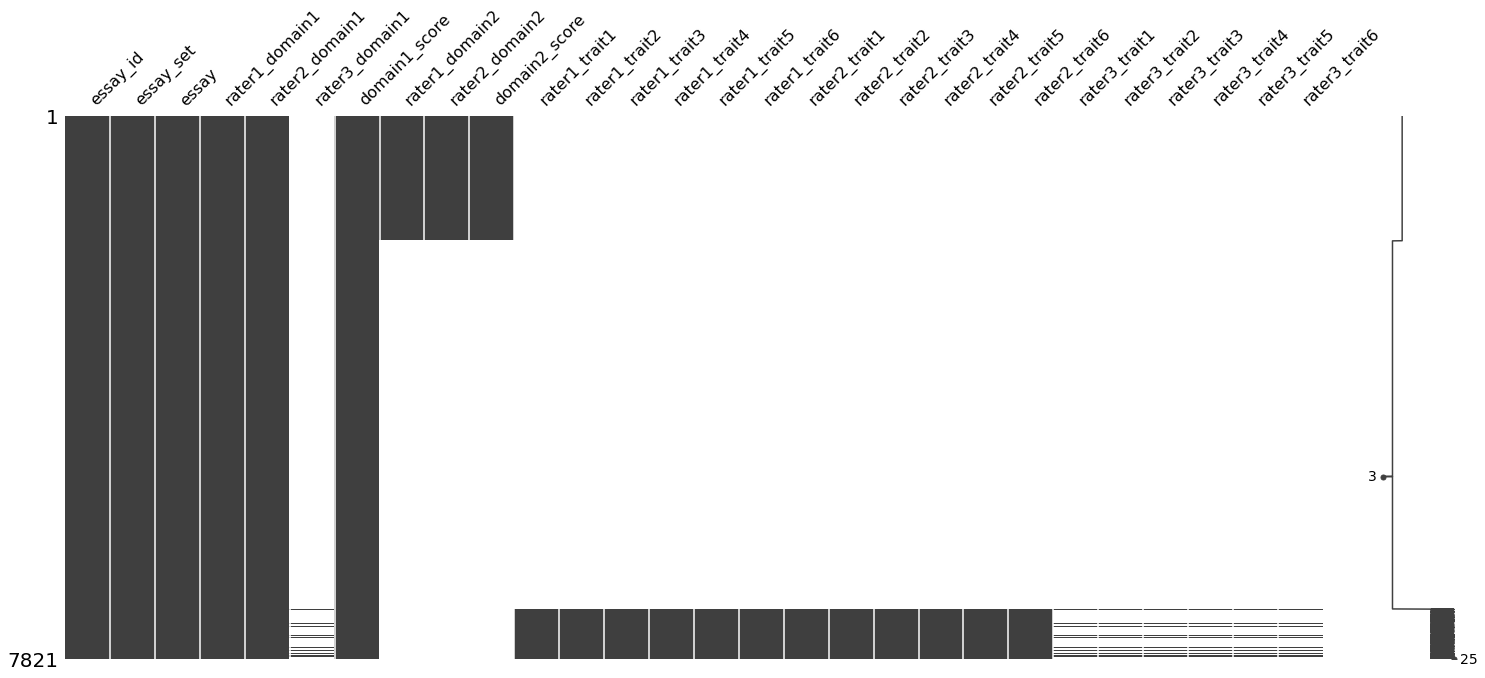

In [10]:
# missing values matrix
msno.matrix(df_grade_10)


In [11]:
df_grade_10.essay_set[~df_grade_10["rater1_trait1"].isnull()].unique()

array([8], dtype=int64)

In [12]:
essay_df = df_grade_10.copy()

df_2_essay = essay_df[essay_df["essay_set"] == 2]
df_3_essay = essay_df[essay_df["essay_set"] == 3]
df_4_essay = essay_df[essay_df["essay_set"] == 4]
df_6_essay = essay_df[essay_df["essay_set"] == 6]
df_8_essay = essay_df[essay_df["essay_set"] == 8]


# Only being used to make the anonymization_list
df_6_essay_ser = df_6_essay["essay"].reset_index(drop=True)
list_6_essay = df_6_essay_ser.tolist()

<AxesSubplot:>

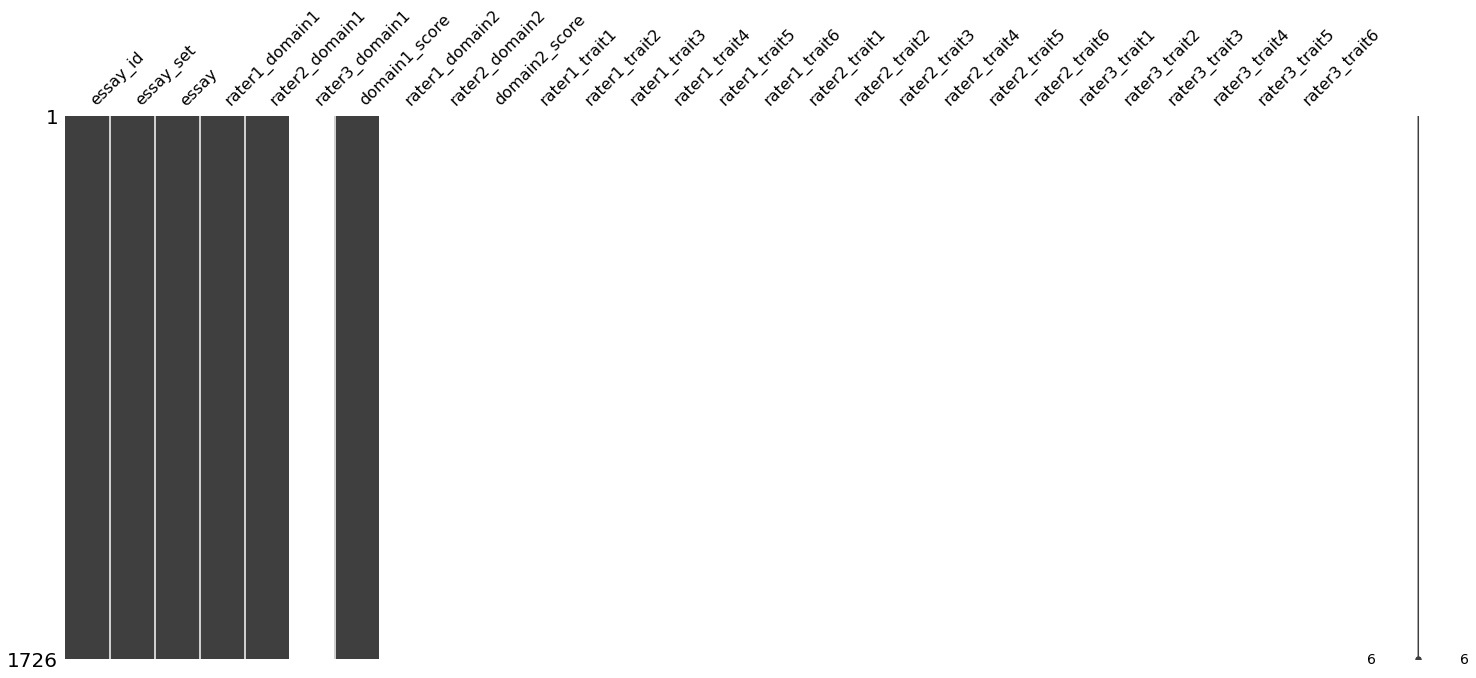

In [13]:
msno.matrix(df_3_essay)

<AxesSubplot:>

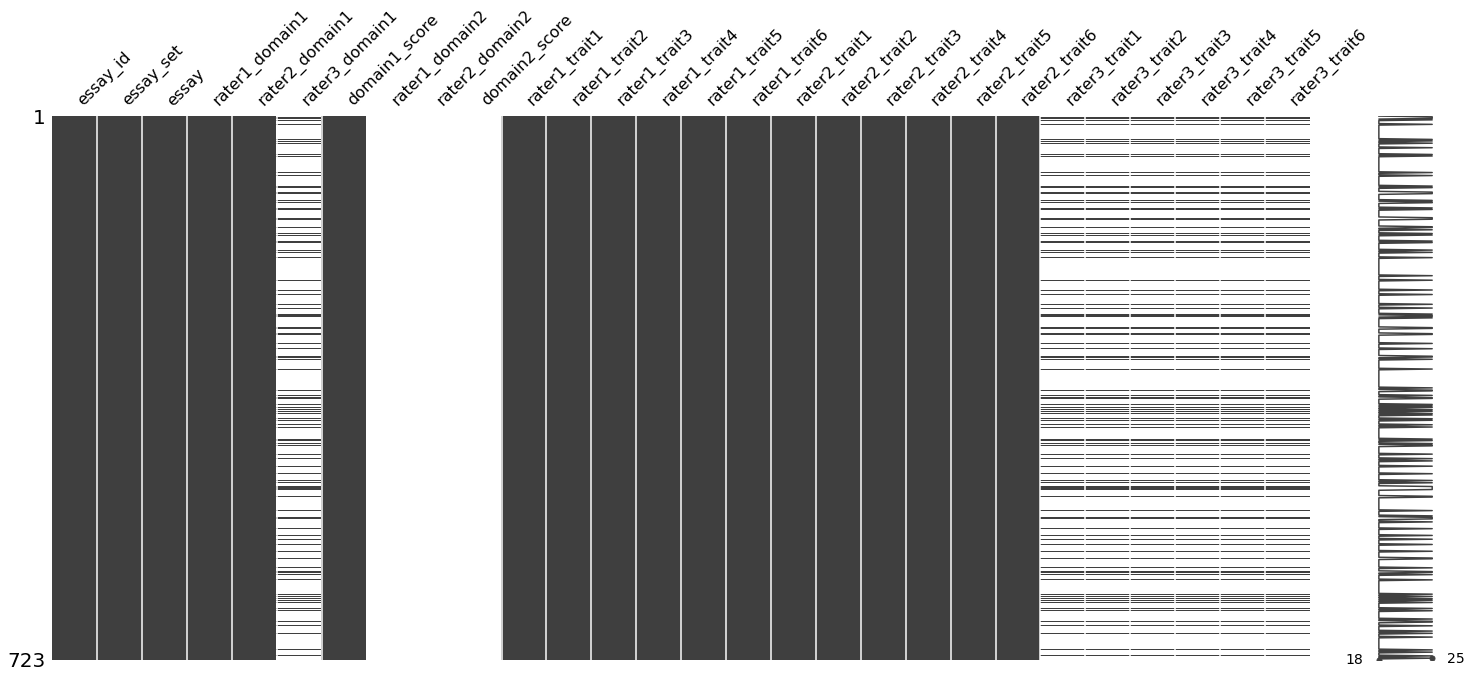

In [14]:
msno.matrix(df_8_essay)

In [15]:
df_2_essay["domain1_score"].head()
df_3_essay["domain1_score"].unique()
df_8_essay["domain1_score"].head()

12255    34.0
12256    46.0
12257    40.0
12258    30.0
12259    26.0
Name: domain1_score, dtype: float64

In [16]:
df_8_essay["domain1_score"] = df_8_essay.domain1_score.astype(int)
df_8_essay["domain1_score"].describe()

C:\Users\OaklandHillsMansion\AppData\Local\Temp\ipykernel_24976\2987455415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8_essay["domain1_score"] = df_8_essay.domain1_score.astype(int)


count    723.000000
mean      36.950207
std        5.753502
min       10.000000
25%       33.000000
50%       37.000000
75%       40.000000
max       60.000000
Name: domain1_score, dtype: float64

<AxesSubplot:xlabel='domain1_score', ylabel='count'>

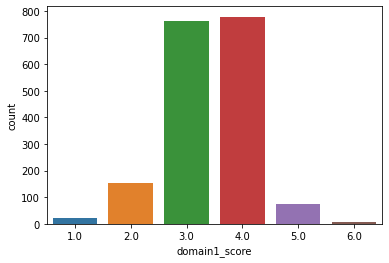

In [17]:
sns.countplot(x="domain1_score", data=df_2_essay)

<AxesSubplot:xlabel='domain1_score', ylabel='count'>

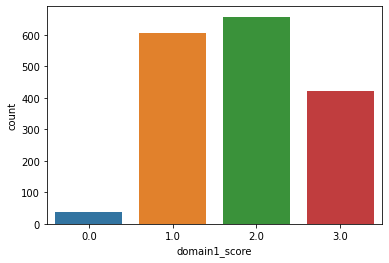

In [18]:
sns.countplot(x="domain1_score", data=df_3_essay)


<AxesSubplot:xlabel='domain1_score'>

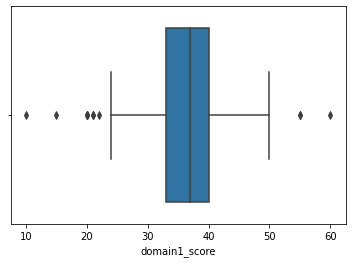

In [19]:

sns.boxplot(x="domain1_score", data=df_8_essay)

C:\Users\OaklandHillsMansion\AppData\Local\Temp\ipykernel_24976\3813863828.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3_essay["is_success"] = np.where(df_3_essay["domain1_score"] > 2, 1, 0)


<AxesSubplot:xlabel='is_success', ylabel='count'>

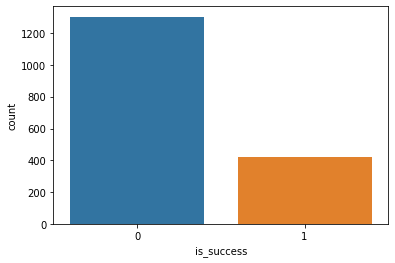

In [20]:
# df_2_essay["is_success"] = np.where(df_2_essay["domain1_score"] > 3, 1, 0)
# sns.countplot(x="is_success", data=df_2_essay)

df_3_essay["is_success"] = np.where(df_3_essay["domain1_score"] > 2, 1, 0)
sns.countplot(x="is_success", data=df_3_essay)

# df_8_essay["is_success"] = np.where(df_8_essay["domain1_score"] > 40, 1, 0)
# sns.countplot(x="is_success", data=df_8_essay)


## Anonymization

In [21]:
anonymization_list = []
for essay in list_6_essay:
    x = re.findall("(?:^|\s)(\@\w+)", essay)
    anonymization_list += x

anonymization_ser = pd.Series(anonymization_list)
anonymization_ser_count = anonymization_ser.value_counts()
anonymization_ser.unique()

array(['@CAPS1', '@NUM1', '@NUM2', '@CAPS2', '@ORGANIZATION3',
       '@LOCATION1', '@DATE1', '@MONEY1', '@ORGANIZATION2',
       '@ORGANIZATION1', '@NUM3', '@CAPS3', '@CAPS4', '@CAPS5', '@CAPS6',
       '@CAPS7', '@CAPS9', '@NUM4', '@LOCATION3', '@PERSON1', '@DATE2',
       '@LOCATION2', '@NUM5', '@LOCATION4', '@NUM6', '@CAPS8', '@CAPS10',
       '@NUM7', '@PERSON2', '@ORGANIZATION1n', '@ORGANIZATION5'],
      dtype=object)

## Spacy

In [22]:
import spacy
# from spacy.matcher import Matcher
# from spacy.pipeline.morphologizer import DEFAULT_MORPH_MODEL


### Prompts

In [24]:
prompt_2 = """
Censorship in the Libraries
"All of us can think of a book that we hope none of our children or any other children have taken off the shelf. But if I have the right to remove that book from the shelf -- that work I abhor -- then you also have exactly the same right and so does everyone else. And then we have no books left on the shelf for any of us." --Katherine Paterson, Author
"""
# # from source_essays import essay_3_prompt
# from source_essays.essay_3_prompts import prompt_3
# from source_essays.essay_4_prompt import prompt_4
# from source_essays.essay_6_prompt import prompt_6


prompt_8 ="""
We all understand the benefits of laughter. For example, someone once said, “Laughter is the shortest distance between two people.” Many other people believe that laughter is an important part of any relationship. Tell a true story in which laughter was one element or part.
"""



### PyTextRank Functions

In [25]:
def get_sent_bounds(doc):
    # Get phrases, vectorize and get sent bounds
    limit_phrases = 4

    phrase_id = 0
    sent_bounds = [ [s.start, s.end, set([])] for s in doc.sents ]

    # Loop through each phrase from the document
    for p in doc._.phrases:
        # ic(phrase_id, p.text, p.rank)

        # Find every sentence the chunk is apert of
        # Loop thorugh each phrase chunk
        for chunk in p.chunks:
            # ic(chunk.start, chunk.end)

            # Loop through all sentences in sent_bounds
            for sent_start, sent_end, sent_vector in sent_bounds:
                # Check if chunk is in the sentence
                if chunk.start >= sent_start and chunk.end <= sent_end:
                    # ic(sent_start, chunk.start, chunk.end, sent_end)

                    # Add phrase_id to sent_vector from sent_bounds
                    sent_vector.add(phrase_id)
                    break

        phrase_id += 1

        if phrase_id == limit_phrases:
            break
    
    return sent_bounds

def get_unit_vector(key_doc):

    # Get phrases, vectorize and get sent bounds
    limit_phrases = 4

    phrase_id = 0
    unit_vector = []

    # Loop through each phrase from the document
    for p in key_doc._.phrases:
        # ic(phrase_id, p.text, p.rank)

        # Add rank to unit_vector list
        unit_vector.append(p.rank)

        phrase_id += 1

        if phrase_id == limit_phrases:
            break

    return unit_vector

def normalize_unit_vector(unit_vector):
    # Sum unit vectors for normalization
    sum_ranks = sum(unit_vector)

    # Normalize unit vector
    unit_vector = [ rank/sum_ranks for rank in unit_vector ]

    return unit_vector


def sent_uv_rank(unit_vector, sent_bounds):
    # Ranking each sentence based on how similiar they are,
    # in relation to each unit vector, using sum of squares 
    from math import sqrt

    sent_rank = {}
    sent_id = 0

    # Loop through sent_bound list
    for sent_start, sent_end, sent_vector in sent_bounds:
        # ic(sent_vector)
        sum_sq = 0.0
        # ic

        # Loop through each phrase in the key vector and
        # compare it to the sentence
        for phrase_id in range(len(unit_vector)):
            # ic(phrase_id, key_unit_vector[phrase_id])

            # If phrase_id is NOT in the sent add 
            # get the sum_sq of the unit_vector length
            if phrase_id not in sent_vector:
                sum_sq += unit_vector[phrase_id]**2.0

        # Get the square root of the sum of squares
        sent_rank[sent_id] = sqrt(sum_sq)
        sent_id += 1

    return sent_rank


def get_top_ranks(doc, sent_rank):
    from operator import itemgetter
    # sort sent_rank
    sorted(sent_rank.items(), key=itemgetter(1))
    # print(sorted(sent_rank.items(), key=itemgetter(1)))

    # limit for the number of top sentences to collect
    limit_sentences = 5

    sent_text = {}
    sent_id = 0
    top_5_ranks = []
    top_5_word_count = []
    # top_5_avg_sent_len = []
    top_5_lex_div = []

    # Create id for each sentence from the document
    for sent in doc.sents:
        sent_text[sent_id] = sent
        sent_id += 1

    num_sent = 0

    # Loop through sorted sent_rank list
    for sent_id, rank in sorted(sent_rank.items(), key=itemgetter(1)):
        # ic(sent_id, sent_text[sent_id])
        num_sent += 1
        top_5_ranks.append(rank)
        
        top_5_word_count.append(surface_proxies.word_count(sent_text[sent_id]))
        # top_5_avg_sent_len.append(surface_proxies.average_sentence_length(doc))
        top_5_lex_div.append(TRUNAJOD.ttr.lexical_diversity_mtld(doc))

        if num_sent == limit_sentences:
            break

    # print(top_5_ranks)
    # min_sent = sent_text[limit_sentences]
    # max_sent = sent_text[0]
    rank_avg = mean(top_5_ranks)
    rank_med = median(top_5_ranks)
    rank_mode = mode(top_5_ranks)

    mean_word_count = mean(top_5_word_count)
    # avg_sent_len = median(top_5_avg_sent_len)
    mean_lex_div = mean(top_5_lex_div)

    return rank_avg, rank_med, rank_mode, mean_word_count, mean_lex_div

def pol_subj(blob):
    polarity = blob.sentiment_assessments.polarity
    subjectivity = blob.sentiment_assessments.subjectivity

    return polarity, subjectivity

### PyTextRank config

In [26]:
@spacy.registry.misc("articles_scrubber")
def articles_scrubber():
    def scrubber_func(span: spacy.tokens.Span) -> str:
        for token in span:
            if token.pos_ not in ["DET", "PRON", "ADJ"]:
                break
            
            span = span[1:]
        return span.lemma_
    return scrubber_func

### TRUNAJOD

In [29]:
df_2_essay

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
1783,2978,2,Certain materials being removed from libraries...,4.0,4.0,NaN,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1784,2979,2,Write a persuasive essay to a newspaper reflec...,1.0,2.0,NaN,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1785,2980,2,Do you think that libraries should remove cert...,2.0,3.0,NaN,2.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1786,2981,2,"In @DATE1's world, there are many things found...",4.0,4.0,NaN,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1787,2982,2,In life you have the 'offensive things'. The l...,4.0,4.0,NaN,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,4773,2,The author is writting about taking books off ...,3.0,2.0,NaN,3.0,3.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3579,4774,2,"I do not think that materials, such as books, ...",3.0,3.0,NaN,3.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3580,4775,2,"Yes we should keep the books,music,movies,an m...",2.0,2.0,NaN,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3581,4776,2,"I do believe that book, magazines, music, mov...",3.0,4.0,NaN,3.0,4.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
import glob

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import spacy
# import textract  # To read .docx files
import TRUNAJOD.givenness
import TRUNAJOD.ttr
from TRUNAJOD import surface_proxies
from TRUNAJOD.syllabizer import Syllabizer
from TRUNAJOD import semantic_measures
import pytextrank
from icecream import ic


model_df = df_2_essay.copy()

model_df = model_df[['essay_id', 'essay_set', 'essay', 'is_success']].reset_index(drop=True)

num_rows = 8
model_df = model_df.iloc[5:num_rows,:]


plt.rcParams["figure.figsize"] = (11, 4)
plt.rcParams["figure.dpi"] = 200

nlp = spacy.load("en_core_web_md")

features = {
    "word_count": [],
    "sentence_count": [],
    "average_sentence_length": [],
    "lexical_diversity_mltd": [],
    # "rank_mean": [],
    # "rank_med": [],
    # "rank_mode": [],
    "key_rank_mean":[],
    "key_rank_med": [],
    "key_rank_mode":[],
    "key_mean_word_count":[],
    "key_mean_lex_div":[],
    "polarity":[],
    "subjectivity":[],
    "success?": [],
}

# add PyTextRank to the spaCy pipeline
nlp.add_pipe("textrank", config={"scrubber": {"@misc": "articles_scrubber"}})

key_words = """
censorship
library
books
Katherine Paterson
"""

# Create key document using the prompt
key_doc = nlp(key_words)
# for p in key_doc._.phrases:
#     ic(p.text, p.rank)


# Looping through essays
for index, row in model_df.iterrows():

    # essay value from row object
    essay = row["essay"]

    # Created by processing a string of text with the nlp object
    doc = nlp(essay)
    
    num_sents = surface_proxies.sentence_count(doc)
    word_count = surface_proxies.word_count(doc)

    features["word_count"].append(word_count)
    features["sentence_count"].append(num_sents)
    features["average_sentence_length"].append(surface_proxies.average_sentence_length(doc))
    
    if num_sents > 3:
        print(row["essay_id"], word_count)
        features["lexical_diversity_mltd"].append(TRUNAJOD.ttr.lexical_diversity_mtld(doc))
    
    else:
        features["lexical_diversity_mltd"].append(0)
    

    if num_sents > 3:

        sent_bounds = get_sent_bounds(doc)

        key_unit_vector = get_unit_vector(key_doc)
        key_unit_vector = normalize_unit_vector(key_unit_vector)
        key_sent_rank = sent_uv_rank(key_unit_vector, sent_bounds)
        key_rank_mean, key_rank_med, key_rank_mode, key_mean_word_count, key_mean_lex_div = get_top_ranks(doc, key_sent_rank)

        # unit_vector = get_unit_vector(doc)
        # sent_bounds = get_sent_bounds(doc)
        # unit_vector = normalize_unit_vector(unit_vector)
        # sent_rank = sent_uv_rank(unit_vector, sent_bounds)
        # rank_mean, rank_med, rank_mode, mean_word_count, mean_lex_div = get_top_ranks(doc, sent_rank)

        # features["rank_mean"].append(rank_mean)
        # features["rank_med"].append(rank_med)
        # features["rank_mode"].append(rank_mode)

        features["key_mean_word_count"].append(key_mean_word_count)
        features["key_mean_lex_div"].append(key_mean_lex_div)
        # print()

        features["key_rank_mean"].append(key_rank_mean)
        features["key_rank_med"].append(key_rank_med)
        features["key_rank_mode"].append(key_rank_mode)
    
        blob = TextBlob(essay)
        # Polarity & Subjective
        polarity, subjectivity = pol_subj(blob)
        # print(polarity, subjectivity)
        features["polarity"].append(polarity)
        features["subjectivity"].append(subjectivity)
    
    else:

        # features["rank_mean"].append(np.nan)
        # features["rank_med"].append(np.nan)
        # features["rank_mode"].append(np.nan)

        features["key_rank_mean"].append(np.nan)
        features["key_rank_med"].append(np.nan)
        features["key_rank_mode"].append(np.nan)
    
        features["key_mean_word_count"].append(np.nan)
        features["key_mean_lex_div"].append(np.nan)

        features["polarity"].append(np.nan)
        features["subjectivity"].append(np.nan)


    # this example 5th grade
    is_success = row["is_success"]
    features["success?"].append(is_success)


KeyError: "['is_success'] not in index"

In [ ]:
df = pd.DataFrame(features)
df.info()

,word_count,sentence_count,average_sentence_length,lexical_diversity_mltd,key_rank_mean,key_rank_med,key_rank_mode,key_mean_word_count,key_mean_lex_div,polarity,subjectivity,success?
0,51,4,12.750,18.904425,0.407311,0.398819,0.330330,12.75,18.904425,0.500000,0.500000,0
1,177,12,14.750,49.607693,0.445187,0.438700,0.501275,15.00,49.607693,0.157980,0.587475,0
2,97,8,12.125,67.837997,0.395811,0.361884,0.330330,15.80,67.837997,0.298810,0.511905,0
3,88,4,22.000,49.881360,0.427851,0.430106,0.501275,22.00,49.881360,0.148295,0.371402,0
4,135,4,33.750,31.672927,0.431826,0.424495,0.377040,33.75,31.672927,0.101667,0.508182,0


<AxesSubplot:xlabel='success?', ylabel='lexical_diversity_mltd'>

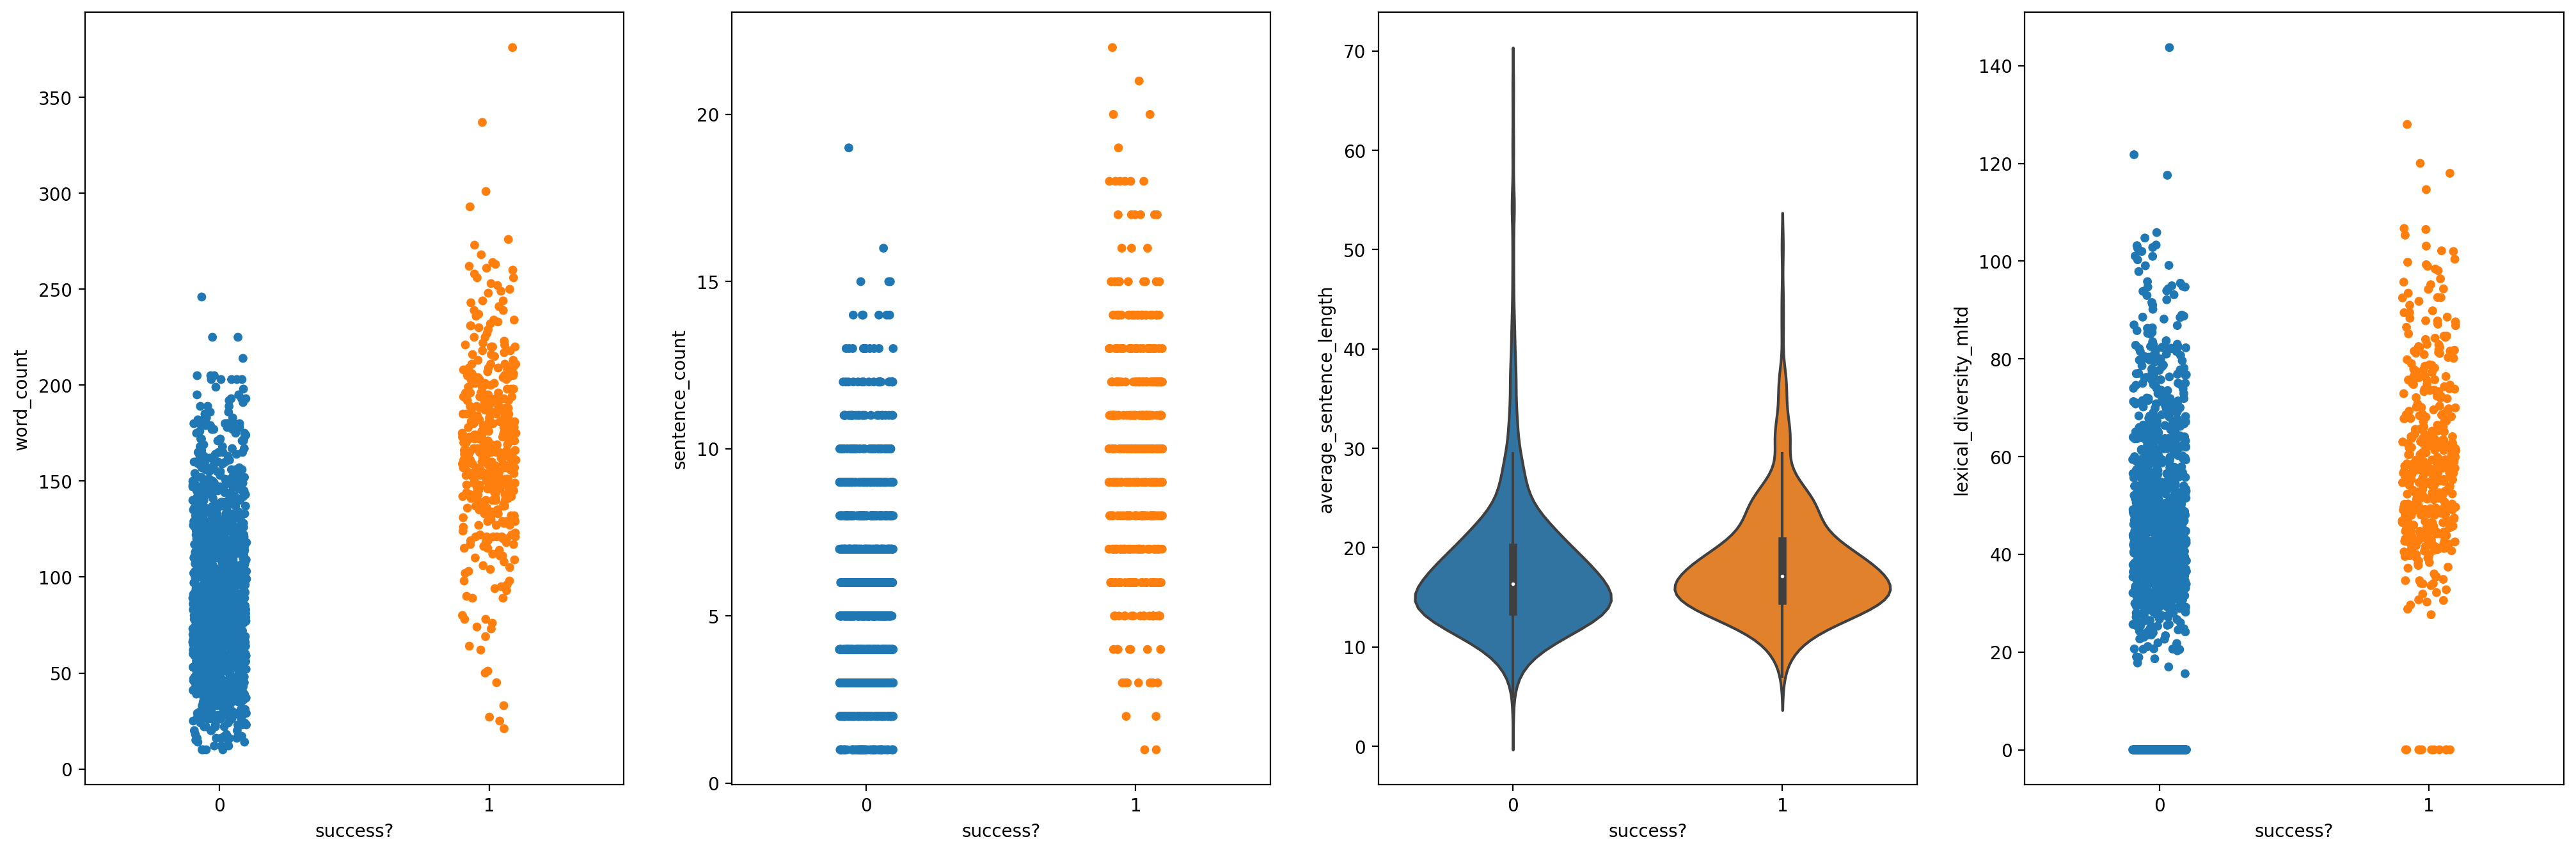

In [ ]:
a4_dims = (25, 8)
# fig, axs = plt.subplots(ncols=3, figsize=a4_dims)
fig, axes = plt.subplots(1, 4, figsize=a4_dims)

sns.stripplot(x="success?", y="word_count", data=df, ax=axes[0])
sns.stripplot(x="success?", y="sentence_count", data=df, ax=axes[1])
sns.violinplot(x="success?", y="average_sentence_length", data=df, ax=axes[2])
sns.stripplot(x="success?", y="lexical_diversity_mltd", data=df, ax=axes[3])

In [ ]:
# a4_dims = (25, 8)
# # fig, axs = plt.subplots(ncols=3, figsize=a4_dims)
# fig, axes = plt.subplots(1, 3, figsize=a4_dims)

# sns.stripplot(x="success?", y="rank_mean", data=df, ax=axes[0])
# sns.stripplot(x="success?", y="rank_med", data=df, ax=axes[1])
# sns.stripplot(x="success?", y="rank_mode", data=df, ax=axes[2])

<AxesSubplot:xlabel='success?', ylabel='key_rank_mode'>

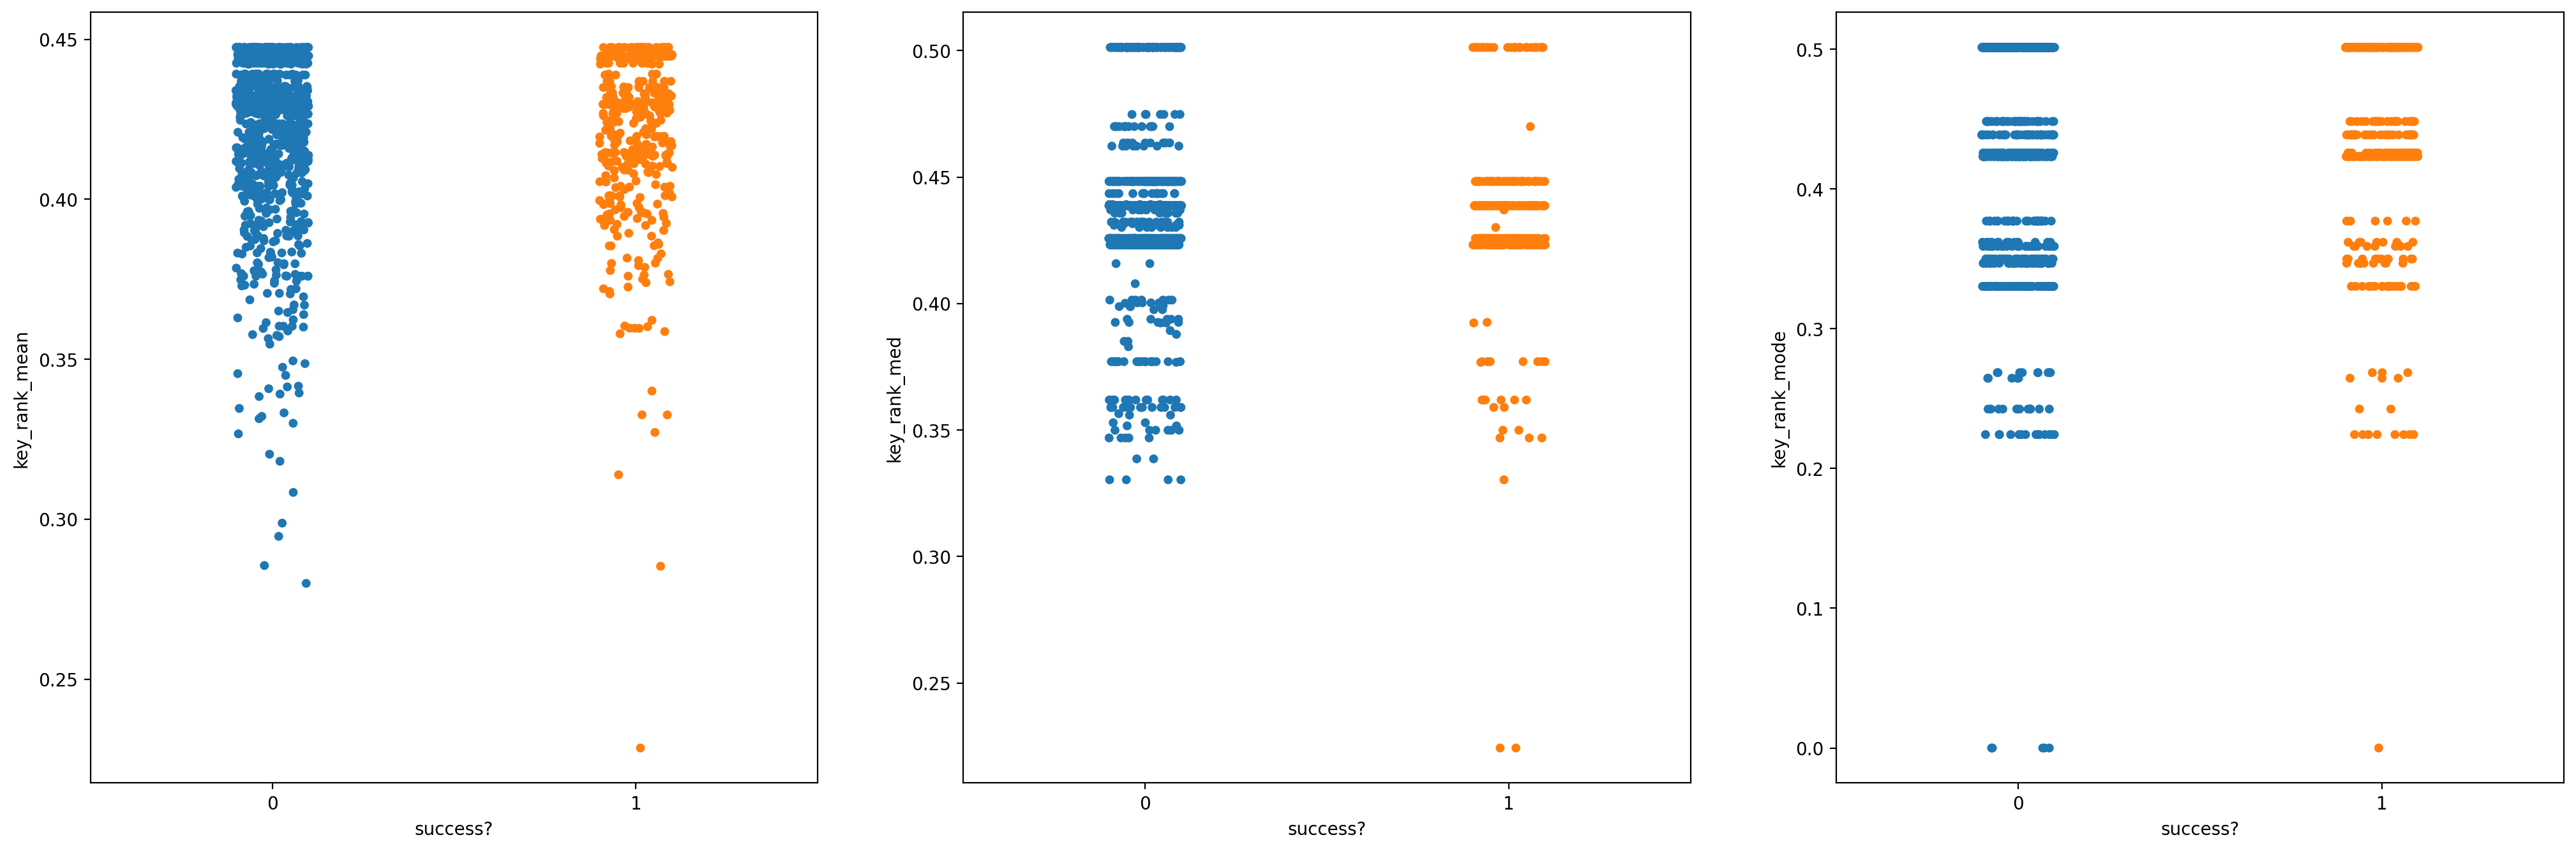

In [ ]:
a4_dims = (25, 8)
# fig, axs = plt.subplots(ncols=3, figsize=a4_dims)
fig, axes = plt.subplots(1, 3, figsize=a4_dims)

sns.stripplot(x="success?", y="key_rank_mean", data=df, ax=axes[0])
sns.stripplot(x="success?", y="key_rank_med", data=df, ax=axes[1])
sns.stripplot(x="success?", y="key_rank_mode", data=df, ax=axes[2])
# sns.boxplot(x="success?", y="max_sent", data=df, ax=axes[3])

<AxesSubplot:xlabel='success?', ylabel='key_mean_lex_div'>

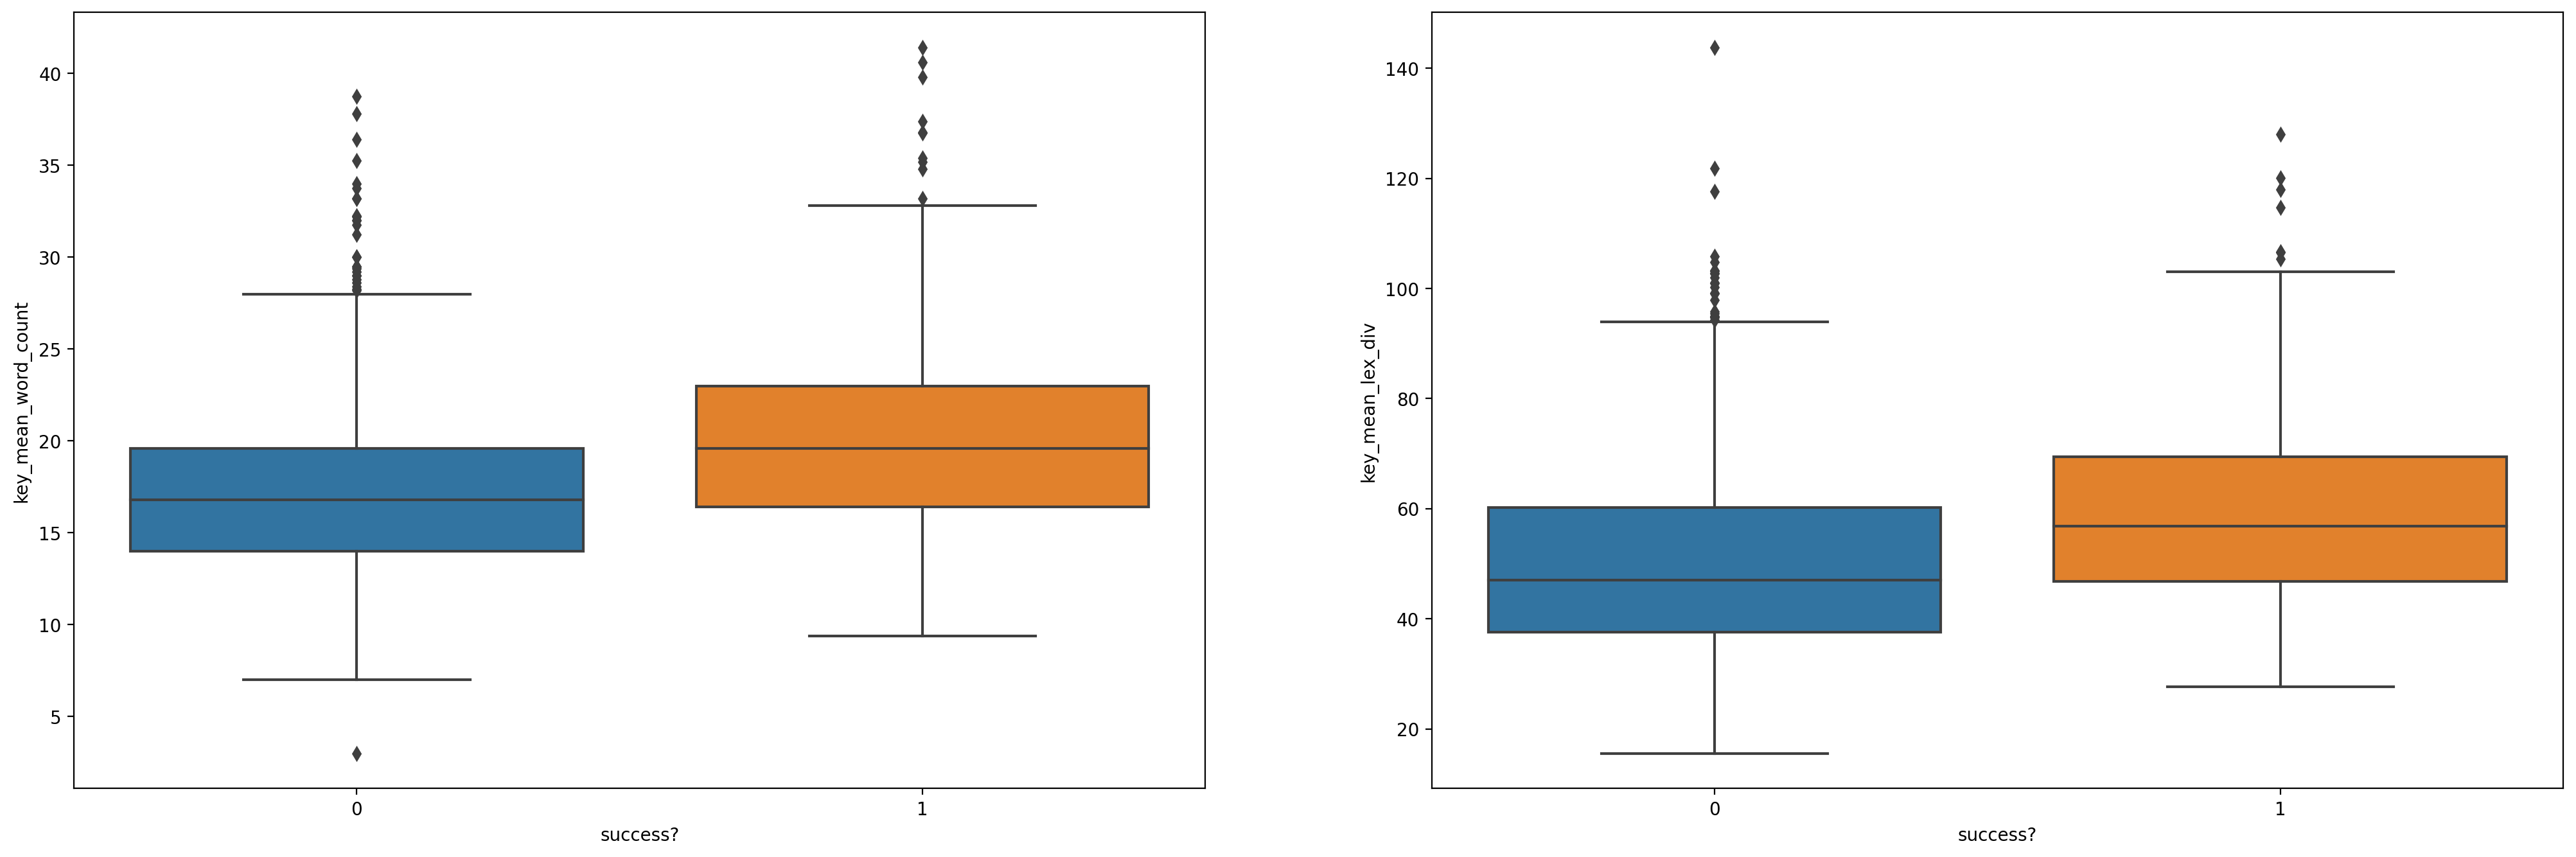

In [ ]:
a4_dims = (25, 8)
# fig, axs = plt.subplots(ncols=3, figsize=a4_dims)
fig, axes = plt.subplots(1, 2, figsize=a4_dims)

sns.boxplot(x="success?", y="key_mean_word_count", data=df, ax=axes[0])
sns.boxplot(x="success?", y="key_mean_lex_div", data=df, ax=axes[1])
# sns.boxplot(x="success?", y="rank_mode", data=df, ax=axes[2])

<AxesSubplot:xlabel='success?', ylabel='subjectivity'>

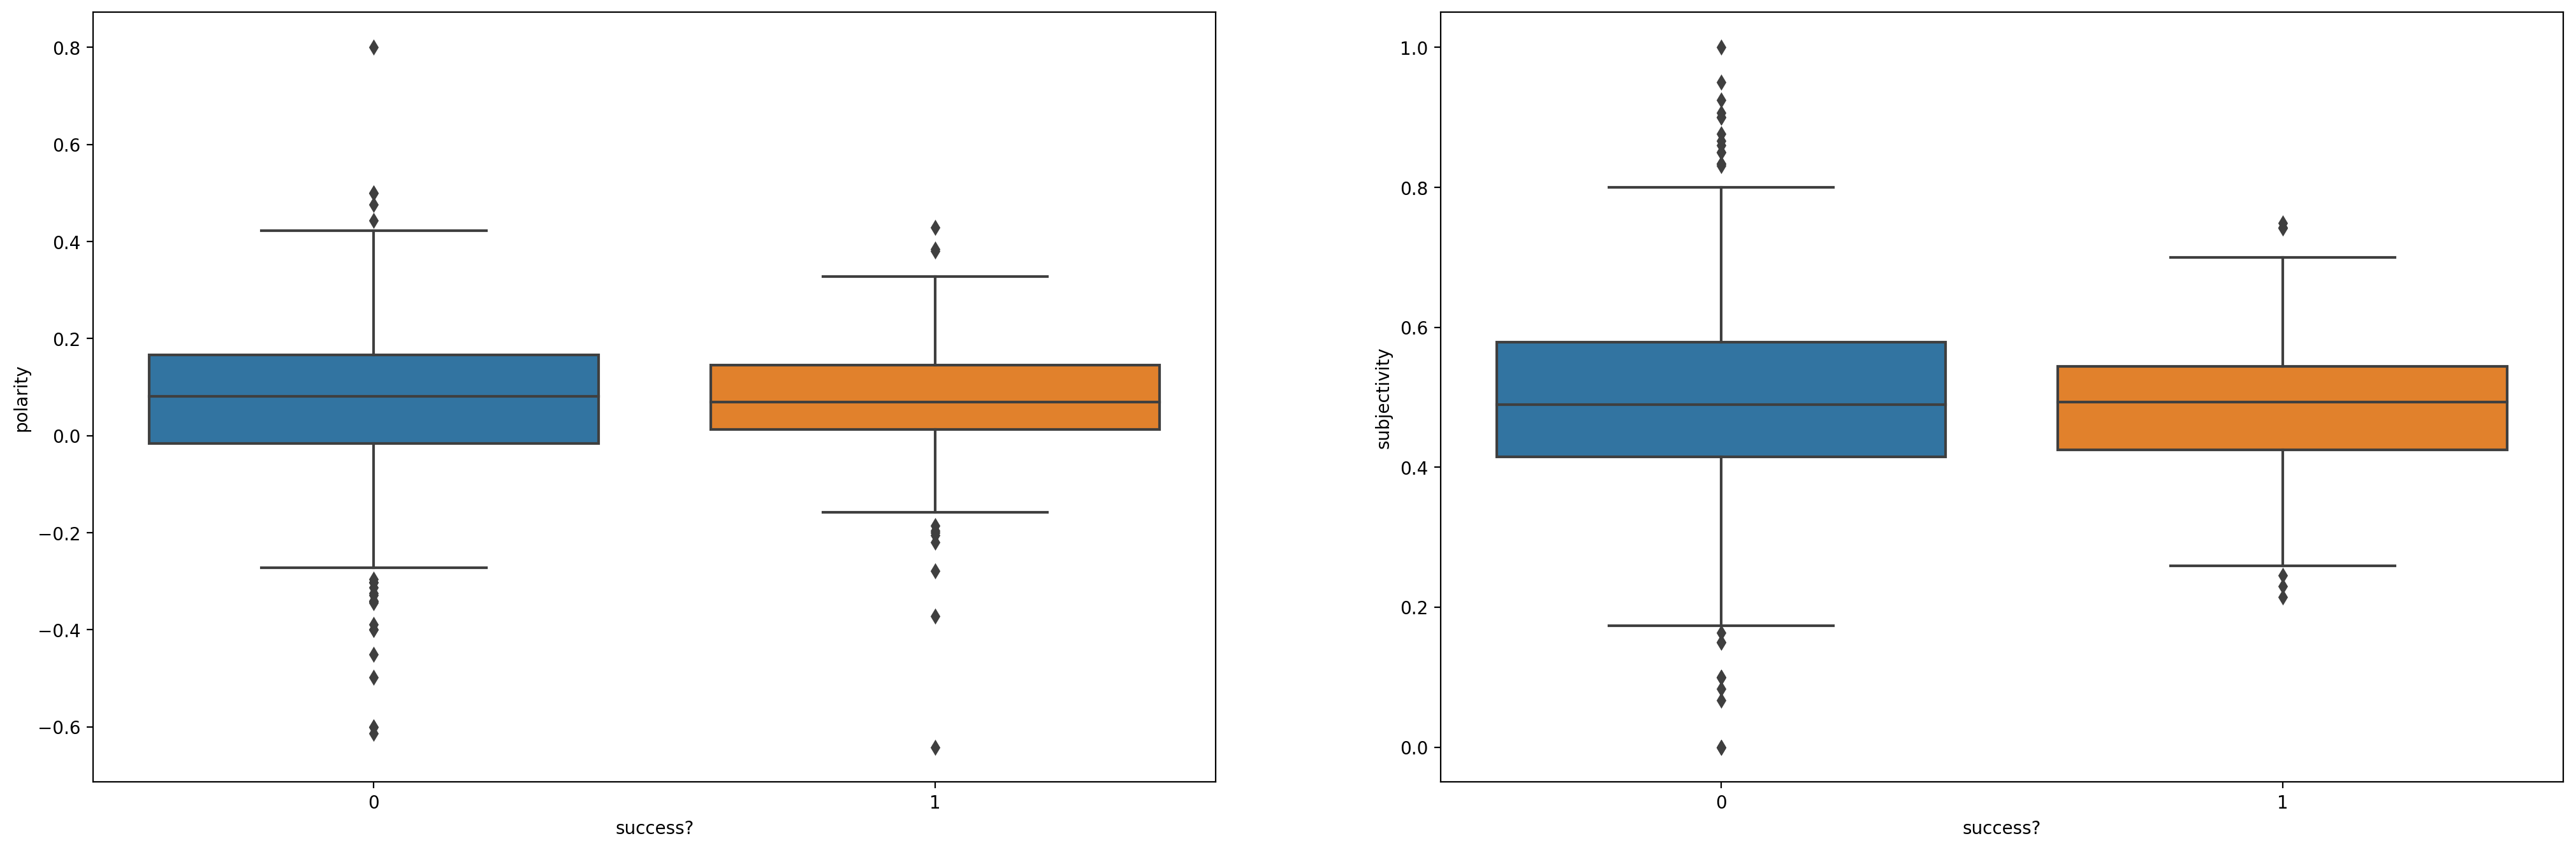

In [ ]:
a4_dims = (25, 8)
# fig, axs = plt.subplots(ncols=3, figsize=a4_dims)
fig, axes = plt.subplots(1, 2, figsize=a4_dims)

sns.boxplot(x="success?", y="polarity", data=df, ax=axes[0])
sns.boxplot(x="success?", y="subjectivity", data=df, ax=axes[1])

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


In [ ]:
df_ = df.fillna(0)

<AxesSubplot:>

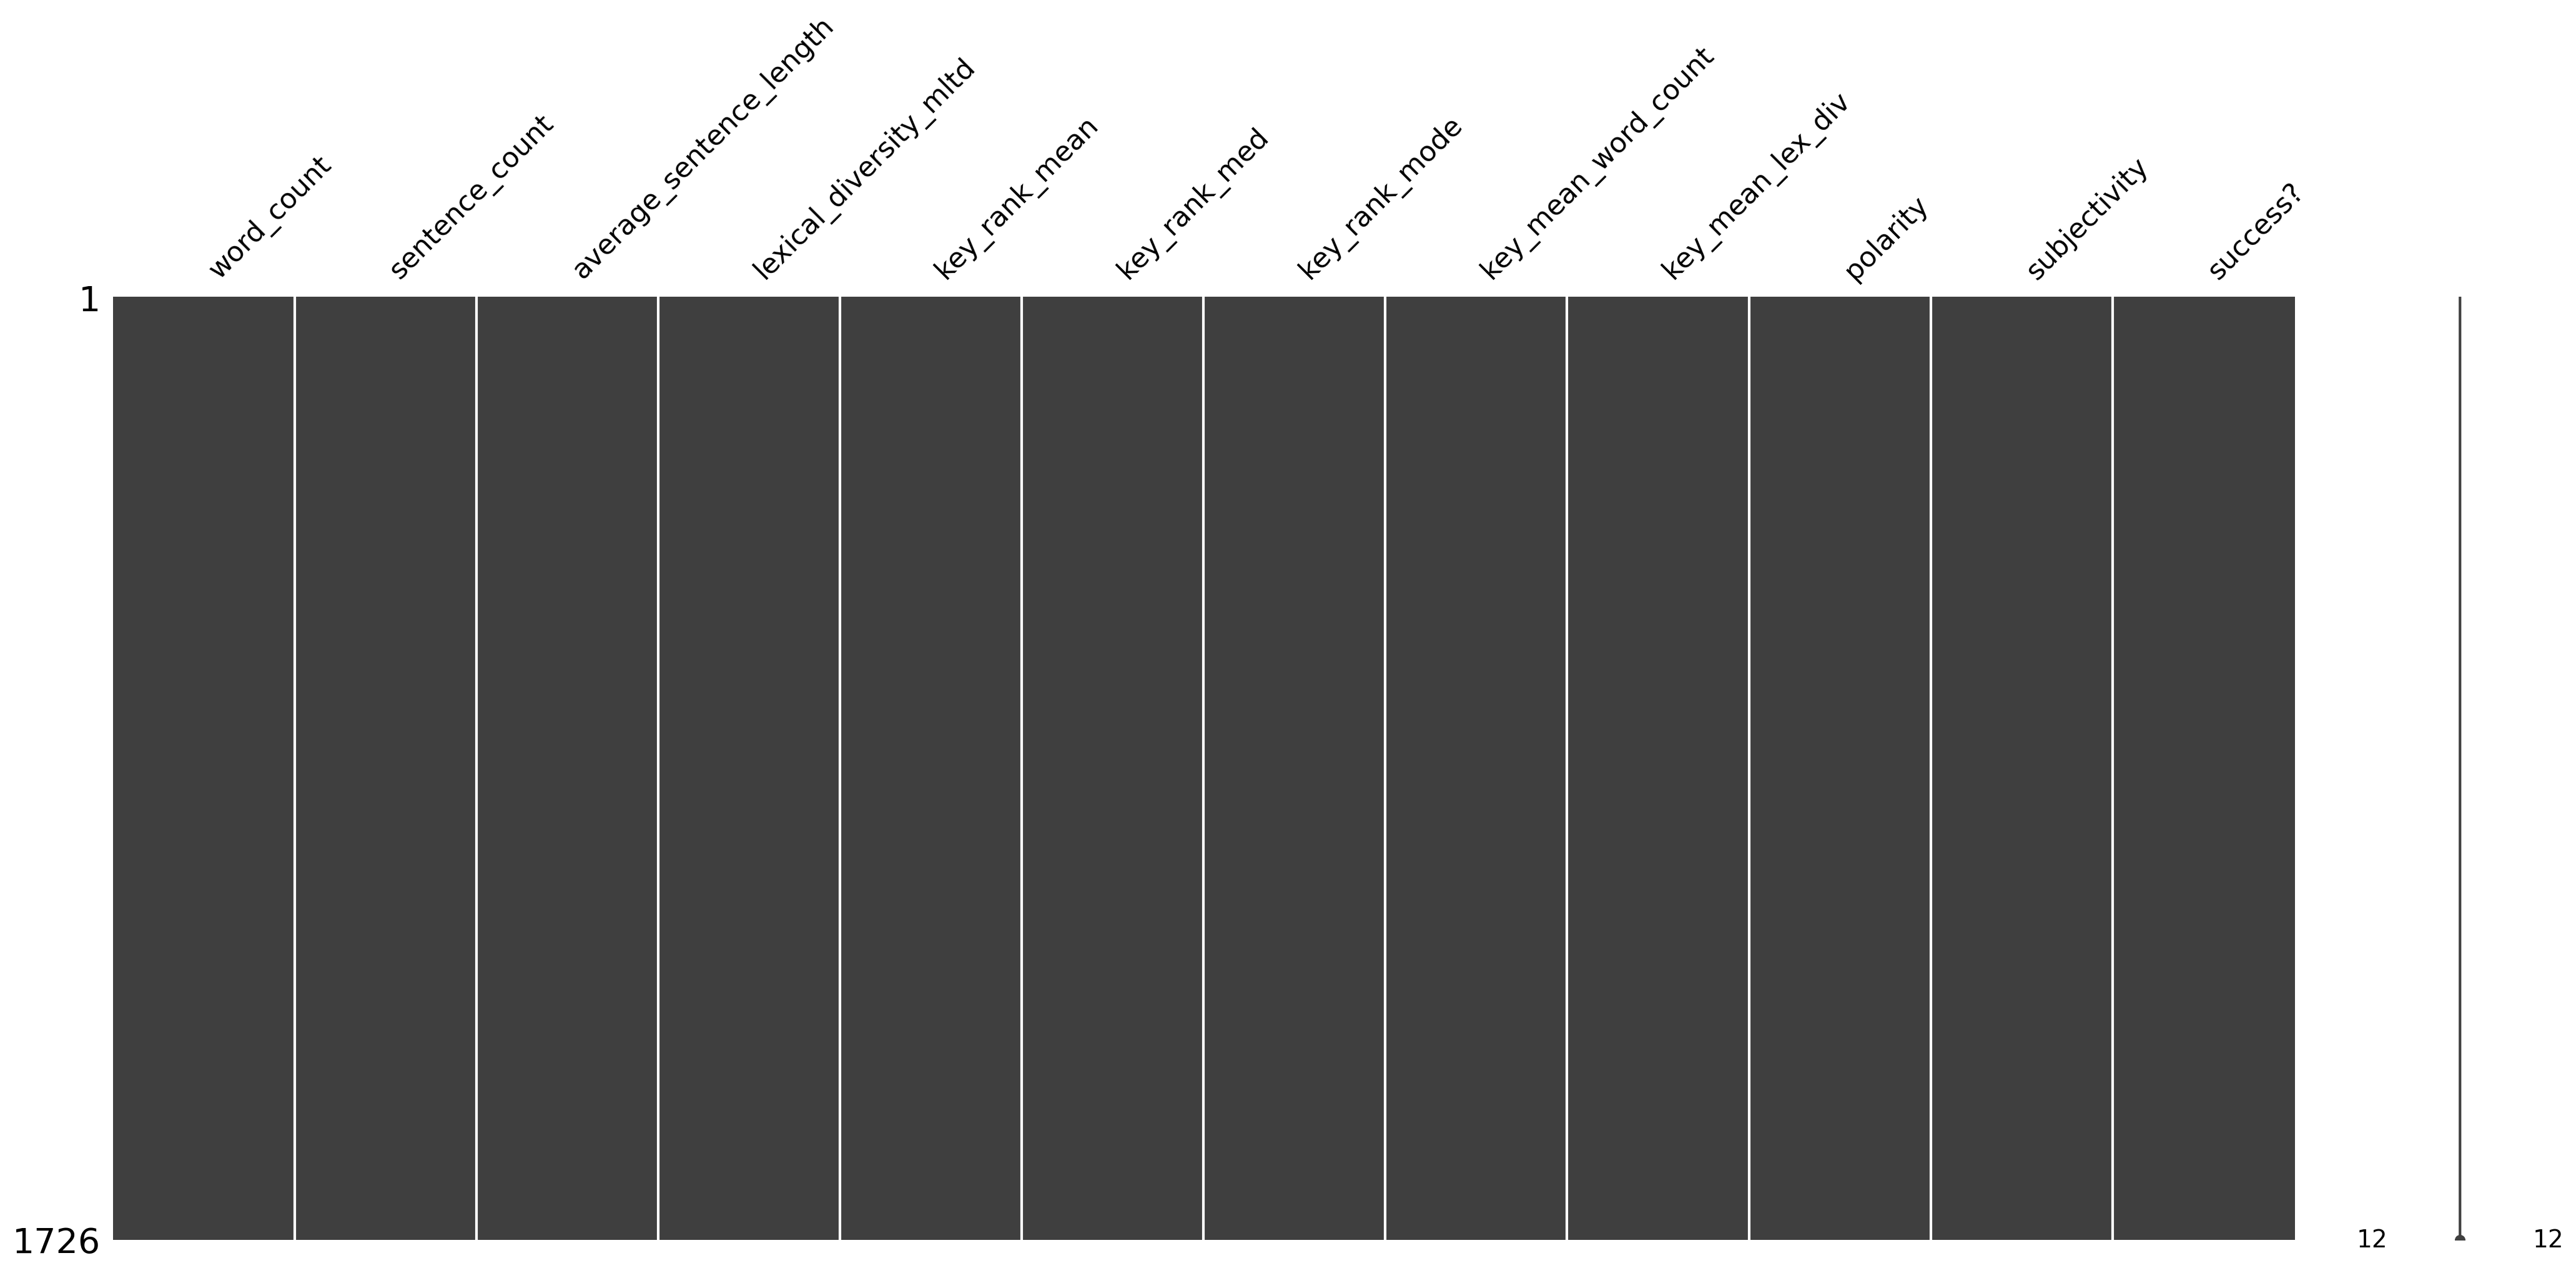

In [ ]:
msno.matrix(df_)

### Create model_data

In [ ]:
model_data = df_.copy()
model_data = model_data.dropna()

<AxesSubplot:>

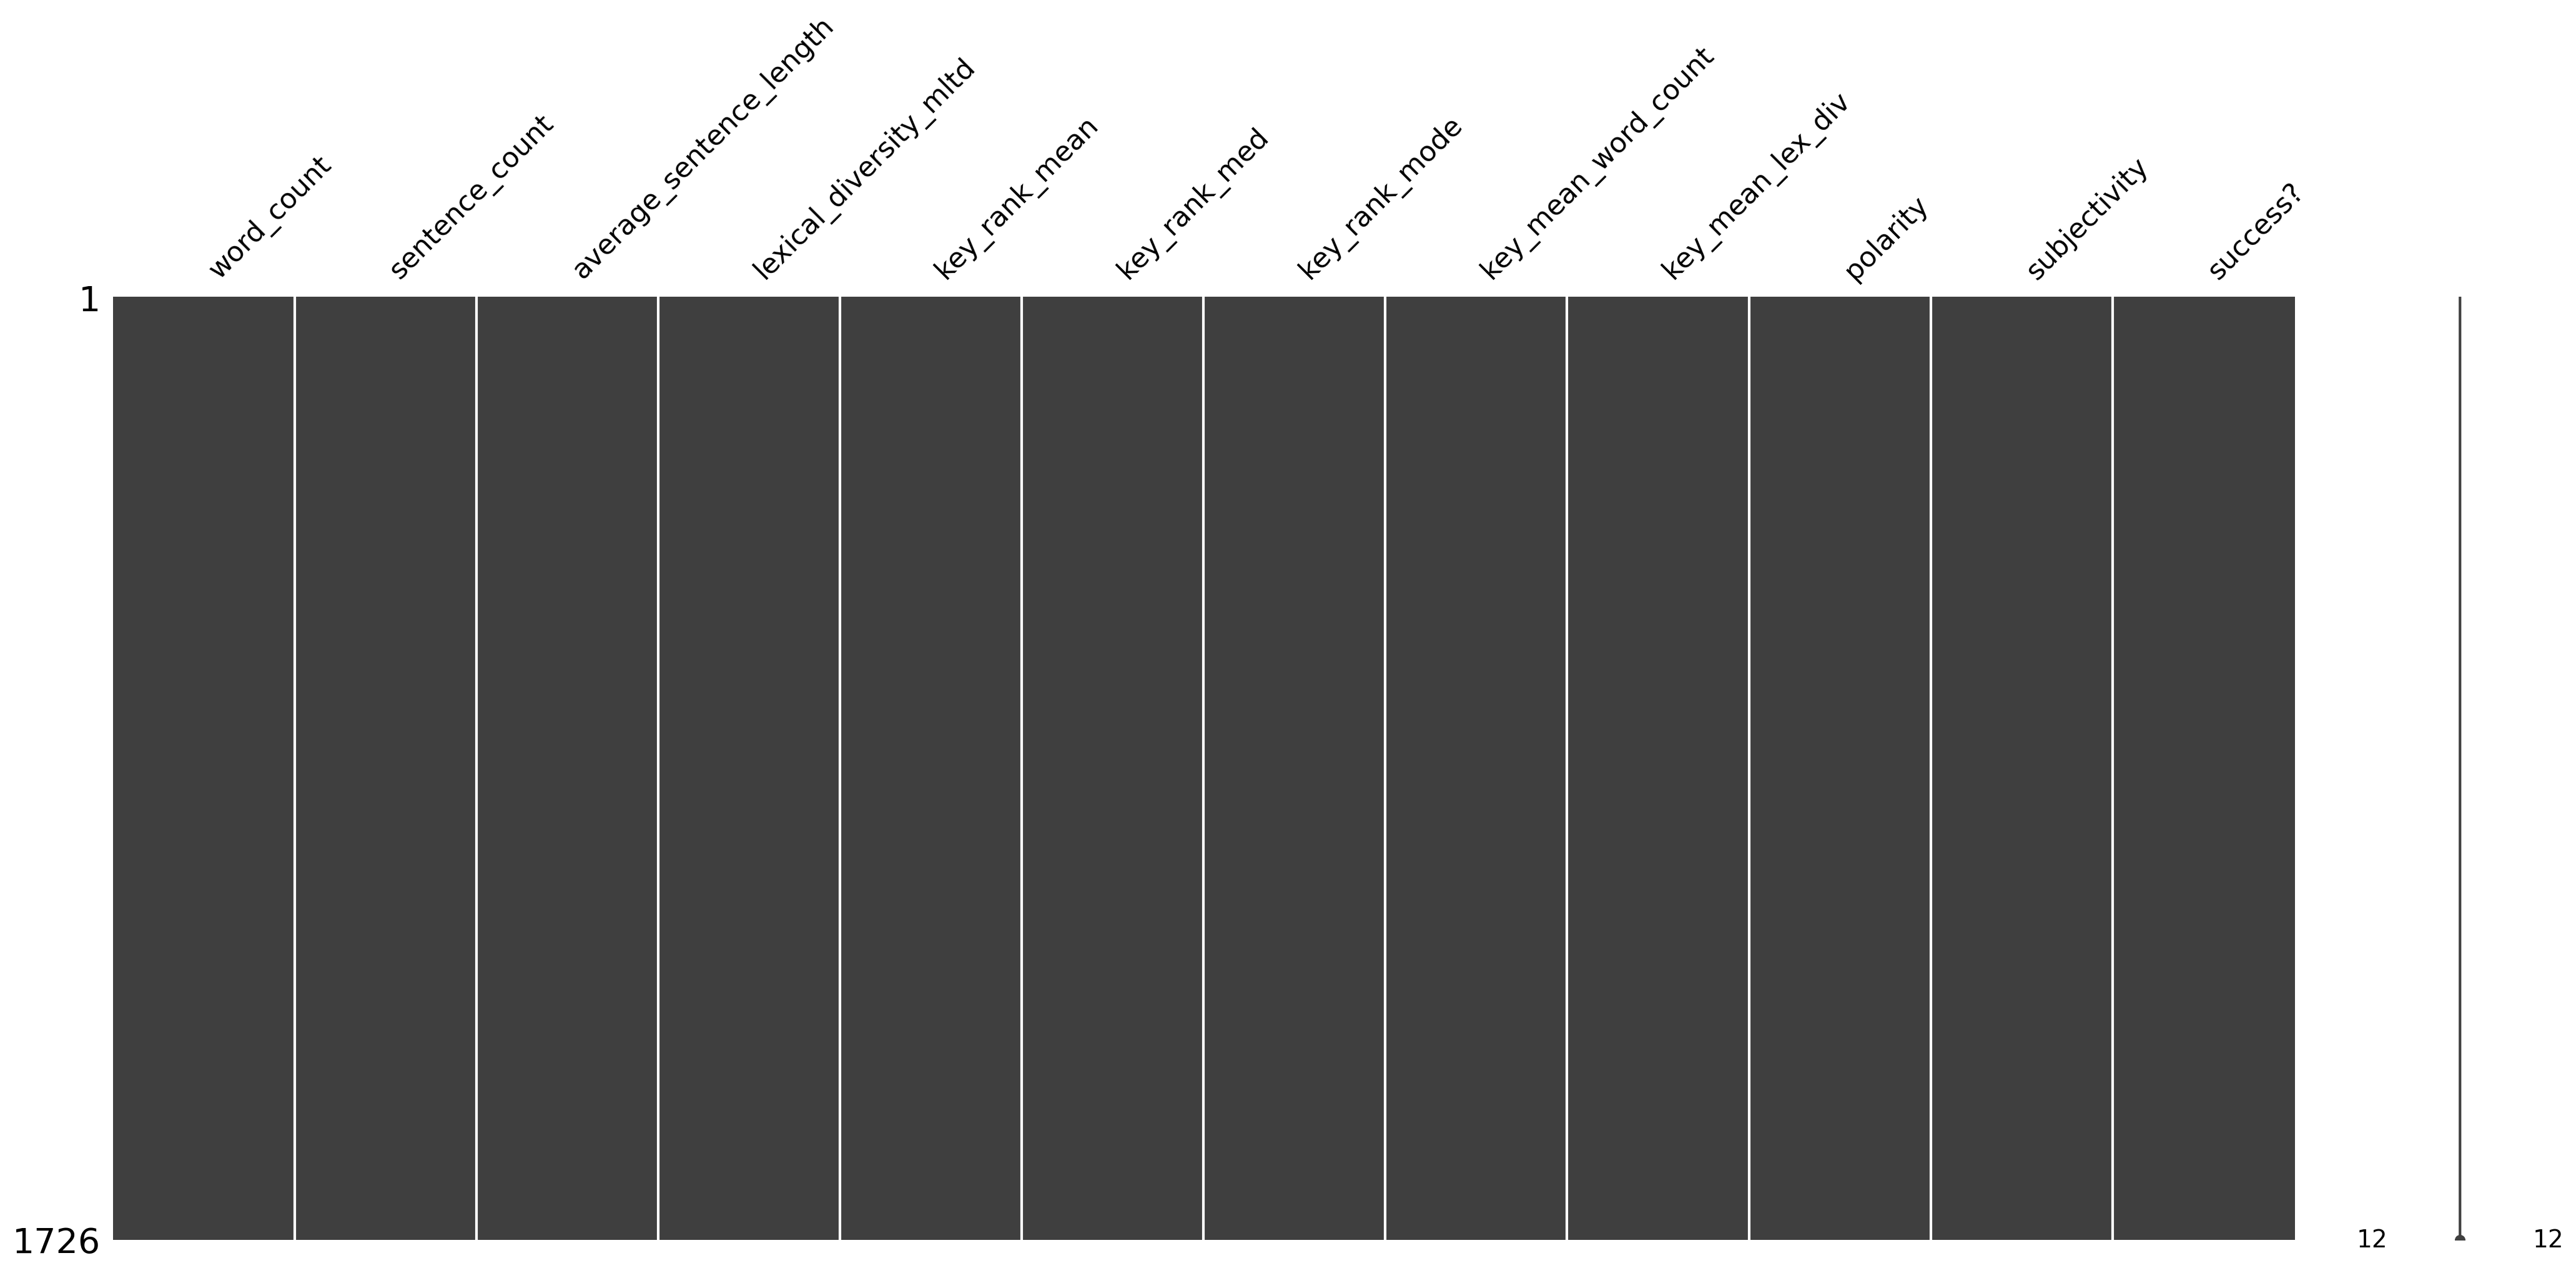

In [ ]:
msno.matrix(model_data)

### Feature data

In [ ]:
feature_data = model_data.copy()

feature_data.drop(["success?"], axis=1, inplace=True)
feature_data

,word_count,sentence_count,average_sentence_length,lexical_diversity_mltd,key_rank_mean,key_rank_med,key_rank_mode,key_mean_word_count,key_mean_lex_div,polarity,subjectivity
0,51,4,12.750000,18.904425,0.407311,0.398819,0.330330,12.75,18.904425,0.500000,0.500000
1,177,12,14.750000,49.607693,0.445187,0.438700,0.501275,15.00,49.607693,0.157980,0.587475
2,97,8,12.125000,67.837997,0.395811,0.361884,0.330330,15.80,67.837997,0.298810,0.511905
3,88,4,22.000000,49.881360,0.427851,0.430106,0.501275,22.00,49.881360,0.148295,0.371402
4,135,4,33.750000,31.672927,0.431826,0.424495,0.377040,33.75,31.672927,0.101667,0.508182
...,...,...,...,...,...,...,...,...,...,...,...
1721,66,7,9.428571,51.133028,0.429580,0.425745,0.358938,9.80,51.133028,-0.095000,0.368333
1722,54,3,18.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
1723,113,6,18.833333,53.420561,0.435122,0.425745,0.377040,21.00,53.420561,0.292208,0.564719
1724,152,7,21.714286,48.240190,0.408578,0.423244,0.423244,19.80,48.240190,0.226042,0.555357


### Target data

In [ ]:
target_data = model_data['success?']
target_data

0       0
1       0
2       0
3       0
4       0
       ..
1721    0
1722    0
1723    0
1724    0
1725    1
Name: success?, Length: 1726, dtype: int64

### Create 10% holdout set

In [ ]:
# from sklearn.model_selection import StratifiedShuffleSplit

# df_ = df.copy()
# df_ = df_.dropna()

# split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

# for train_index, test_valid_index in split.split(df_, df_["success?"]):
#     modeling_data = df_.iloc[train_index]
#     validation_data = df_.iloc[test_valid_index]

X_train, X_test, y_train, y_test = train_test_split(feature_data,target_data,test_size=0.10,random_state=0)

print("Size of modeling set (to be CV split): ", X_train.shape)
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))
print("Size of hold back validation set: ", X_test.shape)
print(y_test.value_counts())
print(y_test.value_counts(normalize=True))

Size of modeling set (to be CV split):  (1553, 11)
0    1171
1     382
Name: success?, dtype: int64
0    0.754024
1    0.245976
Name: success?, dtype: float64
Size of hold back validation set:  (173, 11)
0    132
1     41
Name: success?, dtype: int64
0    0.763006
1    0.236994
Name: success?, dtype: float64


### Create scalar object

In [ ]:
scalar_obj = ColumnTransformer(transformers=[('StandardScaler', StandardScaler(), X_test.columns)],
                                          remainder='passthrough') # Default is to drop untransformed columns

### Define Model

In [ ]:
lr = LogisticRegression(penalty='elasticnet', C=10, l1_ratio=0.01, class_weight='balanced', solver='saga', max_iter=100, multi_class='auto', tol=.0001, random_state=42)
nb = GaussianNB(var_smoothing=5)

### Setup pipeline


In [ ]:
lr_pipeline = Pipeline([
    ('scaler', scalar_obj),
    ('classifier', lr)
])

nb_pipeline = Pipeline([
    ('scaler', scalar_obj),
    ('classifier', nb)
])

### Setup Scorer

In [ ]:
scorer = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'), 
    'F1': make_scorer(f1_score, average='macro')
}

### Logistic Regression

In [ ]:
model_res = cross_validate(lr_pipeline, X_test, y_test, cv=5, scoring=scorer, error_score="raise")

print("Precision(all models) = ",model_res['test_precision'])
print("Recall(all models) = ",model_res['test_recall'])
print("F1(all models) = ",model_res['test_F1'])

print("\n\n")

print("Mean Precision = ",model_res['test_precision'].mean())
print("Mean Recall = ",model_res['test_recall'].mean())
print("Mean F1 = ",model_res['test_F1'].mean())

Precision(all models) =  [0.83333333 0.80357143 0.70238095 0.75480769 0.79644269]
Recall(all models) =  [0.92592593 0.77546296 0.7542735  0.75480769 0.86057692]
F1(all models) =  [0.86       0.78787879 0.70860315 0.75480769 0.81740064]



Mean Precision =  0.7781072188680885
Mean Recall =  0.8142094017094017
Mean F1 =  0.7857380539781372


c:\Users\OaklandHillsMansion\OneDrive - Southern Methodist University\SMU\DS 7337 NLP\nlp_code\nlp_venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\OaklandHillsMansion\OneDrive - Southern Methodist University\SMU\DS 7337 NLP\nlp_code\nlp_venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\OaklandHillsMansion\OneDrive - Southern Methodist University\SMU\DS 7337 NLP\nlp_code\nlp_venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\OaklandHillsMansion\OneDrive - Southern Methodist University\SMU\DS 7337 NLP\nlp_code\nlp_venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did no

### Fit using all variables...

In [ ]:
X_train_ = scalar_obj.fit_transform(X_train)
X_test_ = scalar_obj.transform(X_test)

# Base model
base_model = lr.fit(X_train_,y_train)
# print(base_model.score(X_validate,y_validate)) # Return accuracy

In [ ]:
THRESHOLD = 0.5
lr_model_predictions = np.where(base_model.predict_proba(X_train_)[:,1] > THRESHOLD, 1, 0)

print(classification_report(y_train,lr_model_predictions))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      1171
           1       0.61      0.84      0.71       382

    accuracy                           0.83      1553
   macro avg       0.78      0.83      0.79      1553
weighted avg       0.86      0.83      0.84      1553



In [ ]:
THRESHOLD = 0.3
lr_model_predictions = np.where(base_model.predict_proba(X_train_)[:,1] > THRESHOLD, 1, 0)

print(classification_report(y_train,lr_model_predictions))

              precision    recall  f1-score   support

           0       0.97      0.69      0.81      1171
           1       0.50      0.93      0.65       382

    accuracy                           0.75      1553
   macro avg       0.73      0.81      0.73      1553
weighted avg       0.85      0.75      0.77      1553



In [ ]:
# Best model
best_model = base_model


In [ ]:
def plot_confusion(cf_matrix):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=2)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
    cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n' for v1, v2 in
    zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    # x_axis_labels = ['<30', '>30']
    # y_axis_labels = ['<30', '>30']
    ax = plt.axes()
    # sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    ax.set_title('   Successful Paper Confusion Matrix\n')
    plt.xlabel("predicted success")
    plt.ylabel("true success") 

## Make predictions on hold back validation set to compare metrics to the CV model

In [ ]:
lr_validation_predictions = np.where(best_model.predict_proba(X_test_)[:,1] > THRESHOLD, 1, 0)

print(classification_report(y_test,lr_validation_predictions))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       132
           1       0.65      0.83      0.73        41

    accuracy                           0.86       173
   macro avg       0.80      0.85      0.82       173
weighted avg       0.87      0.86      0.86       173



### Confusion Matrix

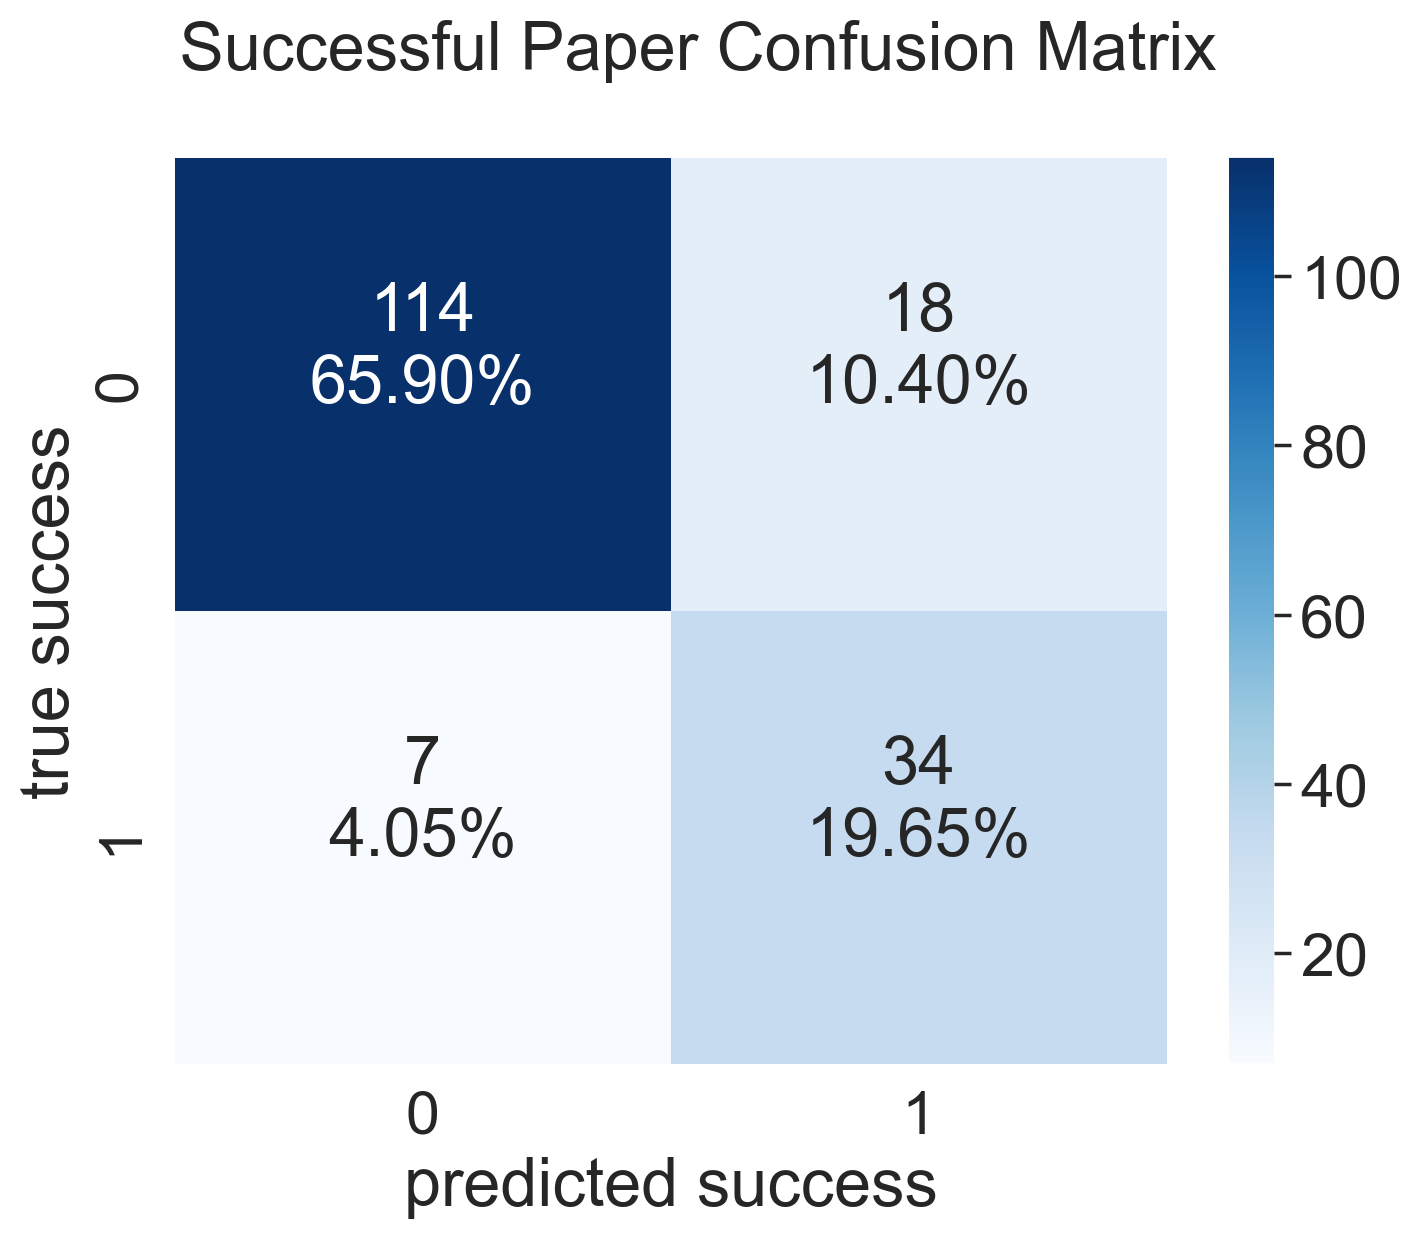

In [ ]:
lr_cm = confusion_matrix(y_test,lr_validation_predictions)
plot_confusion(lr_cm)

### Logistic Regression Feature Importance 

In [ ]:
X_train.columns

Index(['word_count', 'sentence_count', 'average_sentence_length',
       'lexical_diversity_mltd', 'key_rank_mean', 'key_rank_med',
       'key_rank_mode', 'key_mean_word_count', 'key_mean_lex_div', 'polarity',
       'subjectivity'],
      dtype='object')

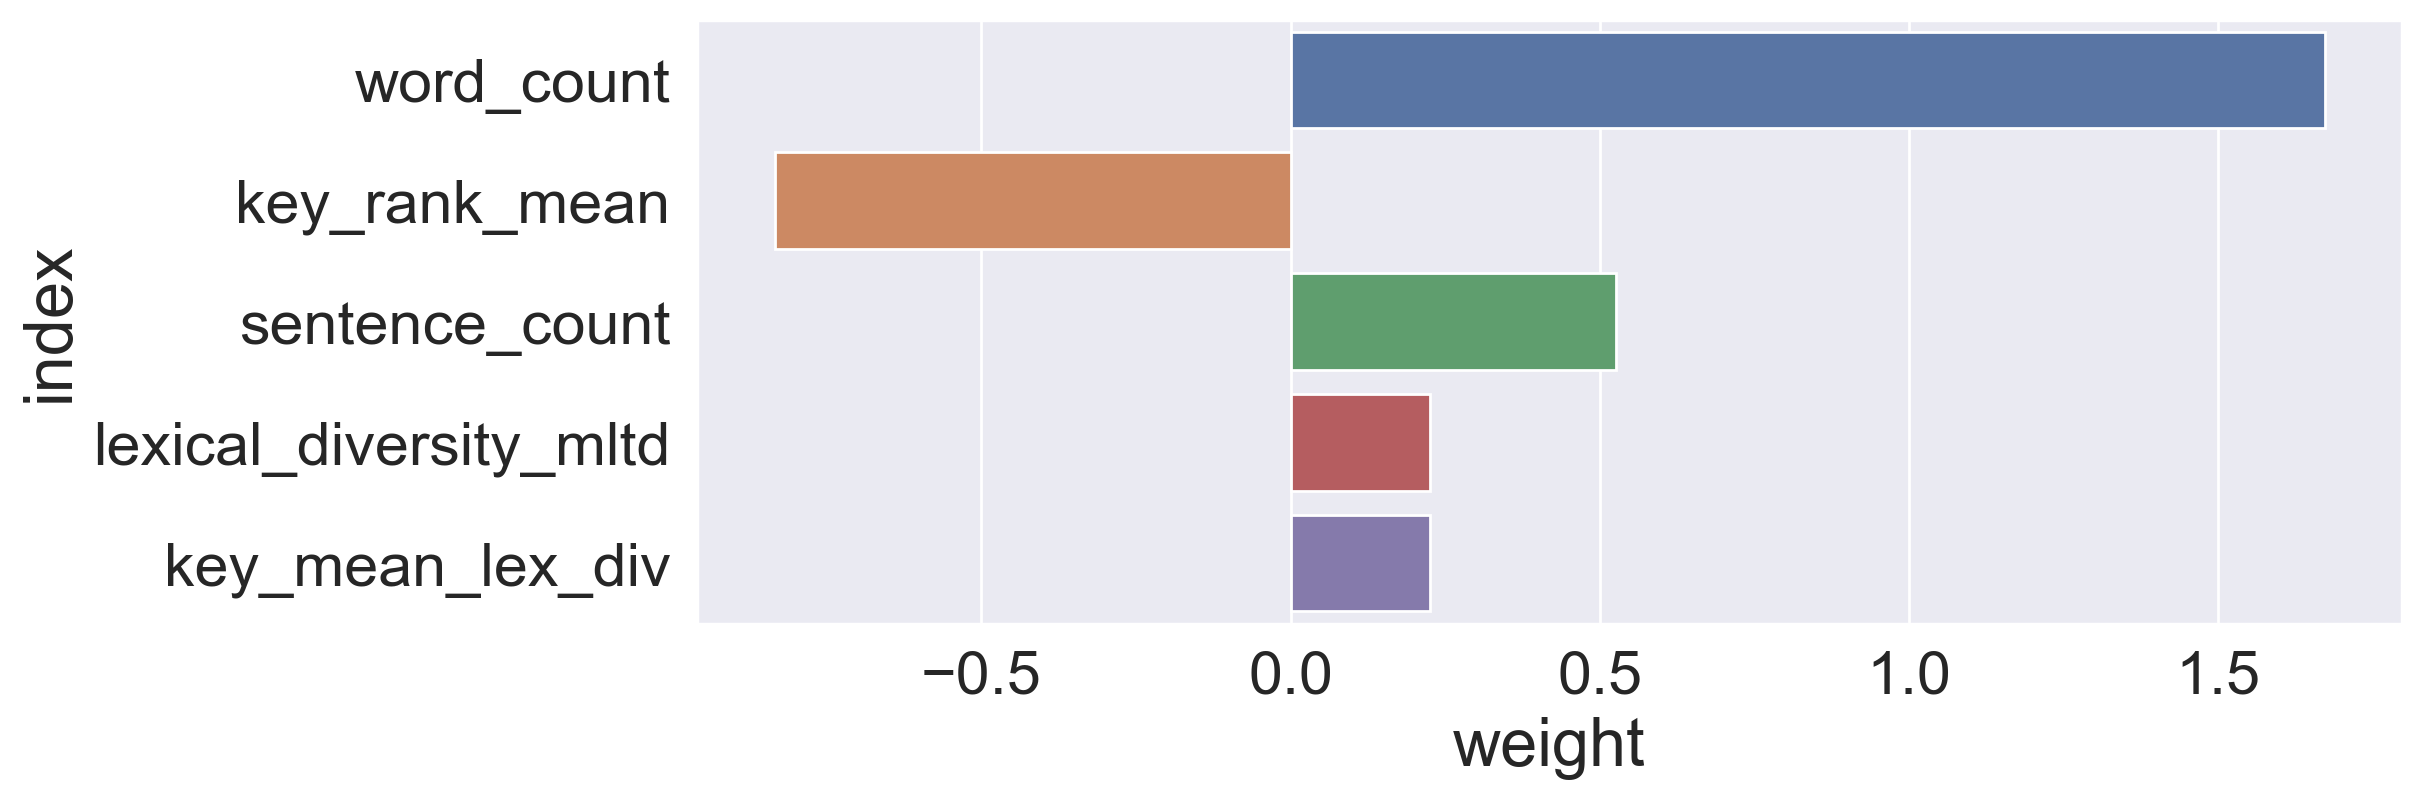

In [ ]:
weights = best_model.coef_.T # take transpose to make a column vector
variable_names = X_train.columns 

coefficients = pd.DataFrame(weights,variable_names)
coefficients = coefficients.rename(columns={coefficients.columns[0]: 'weight'})
coefficients = coefficients.sort_values(by='weight', key=abs, ascending=False)
coefficients.reset_index(level=0, inplace=True)

ax = sns.barplot(y="index", x="weight", data=coefficients.head(5))

### Naive Bayes model

Precision(all models) =  [0.80005656 0.84219457 0.76954023 0.84767025 0.83656723]
Recall(all models) =  [0.67821948 0.7014652  0.69522145 0.66908457 0.70872695]
F1(all models) =  [0.70662893 0.73507564 0.71801479 0.70067953 0.74189054]



Mean Precision =  0.8192057687692312
Mean Recall =  0.6905435295076952
Mean F1 =  0.720457887458907
              precision    recall  f1-score   support

           0       0.97      0.54      0.69      1171
           1       0.40      0.95      0.56       382

    accuracy                           0.64      1553
   macro avg       0.68      0.74      0.63      1553
weighted avg       0.83      0.64      0.66      1553



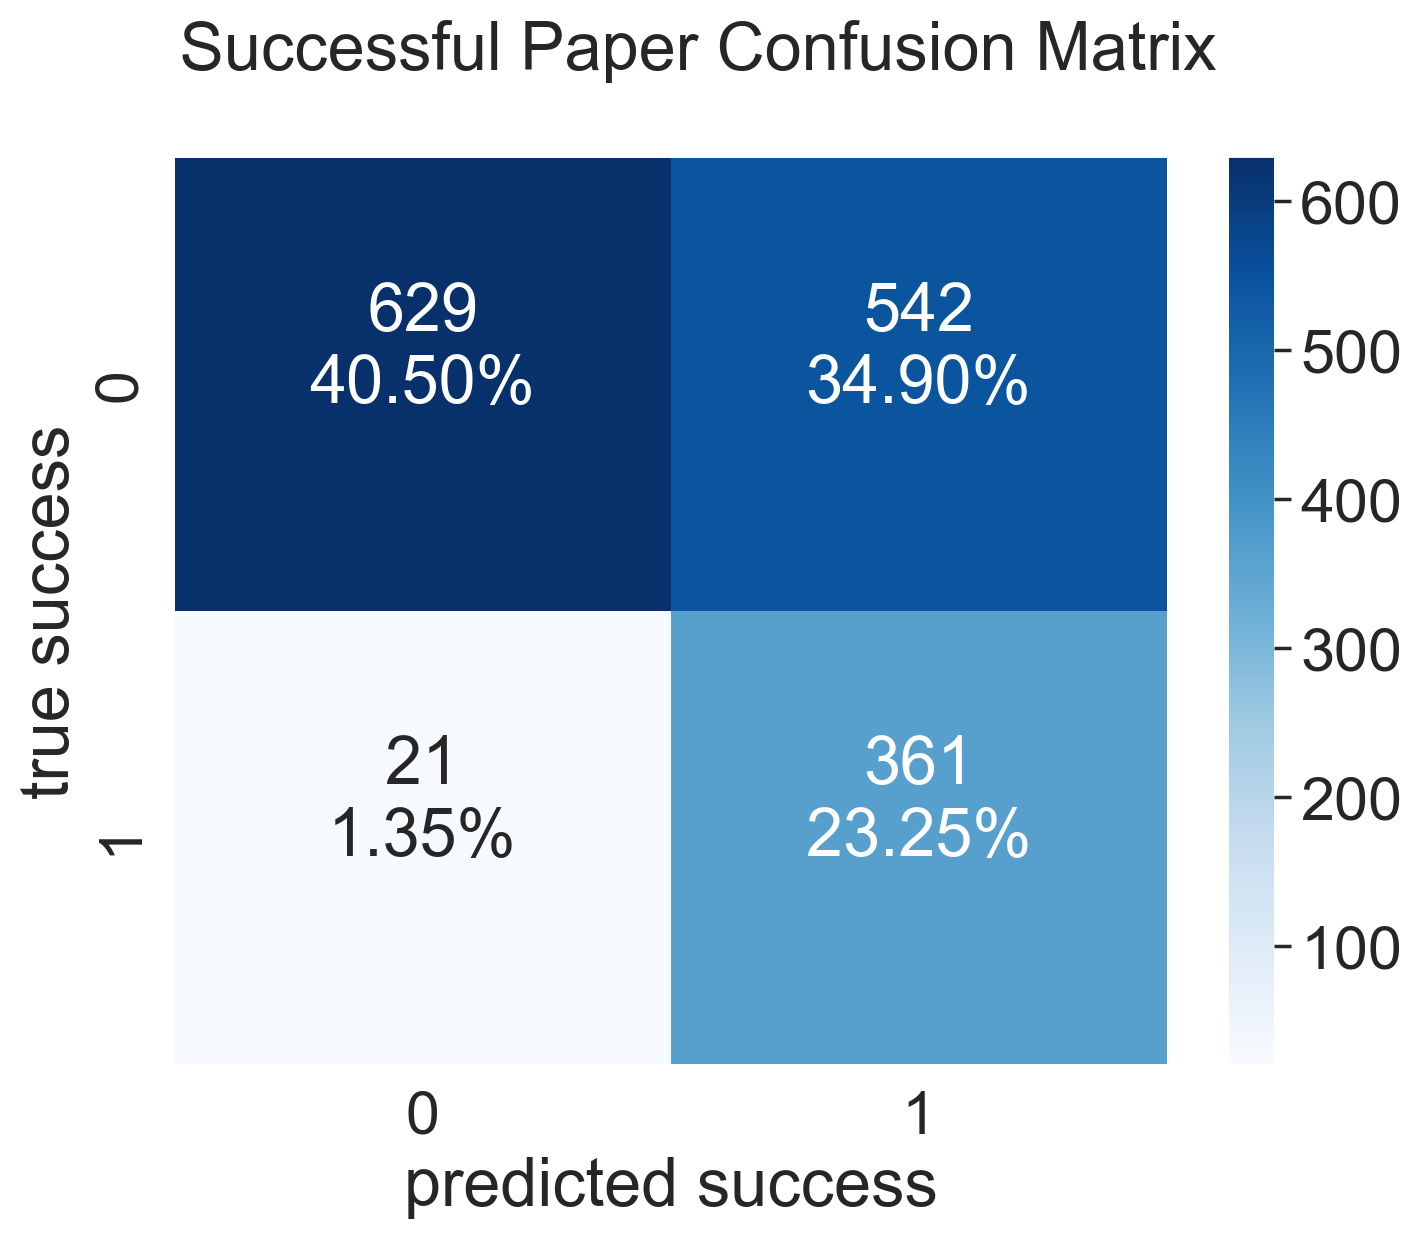

In [ ]:
model_res = cross_validate(nb_pipeline, X_train, y_train, cv=5, scoring=scorer, error_score="raise")

print("Precision(all models) = ",model_res['test_precision'])
print("Recall(all models) = ",model_res['test_recall'])
print("F1(all models) = ",model_res['test_F1'])

print("\n\n")

print("Mean Precision = ",model_res['test_precision'].mean())
print("Mean Recall = ",model_res['test_recall'].mean())
print("Mean F1 = ",model_res['test_F1'].mean())

# scaler = StandardScaler()
# X_model = scal.fit_transform(X_model)
# X_validate = scaler.transform(X_validate)

nb_model = nb.fit(X_train_, y_train)

nb_model_predictions = np.where(nb_model.predict_proba(X_train_)[:,1] > THRESHOLD, 1, 0)
print(classification_report(y_train,nb_model_predictions))

# yhat = nb_model.predict(X_validate)
# nb_validation_predictions = np.where(nb_model.predict_proba(X_validate)[:,1] > THRESHOLD, 1, 0)
# print(classification_report(y_validate,nb_validation_predictions))


nb_cm = confusion_matrix(y_train,nb_model_predictions)
plot_confusion(nb_cm)

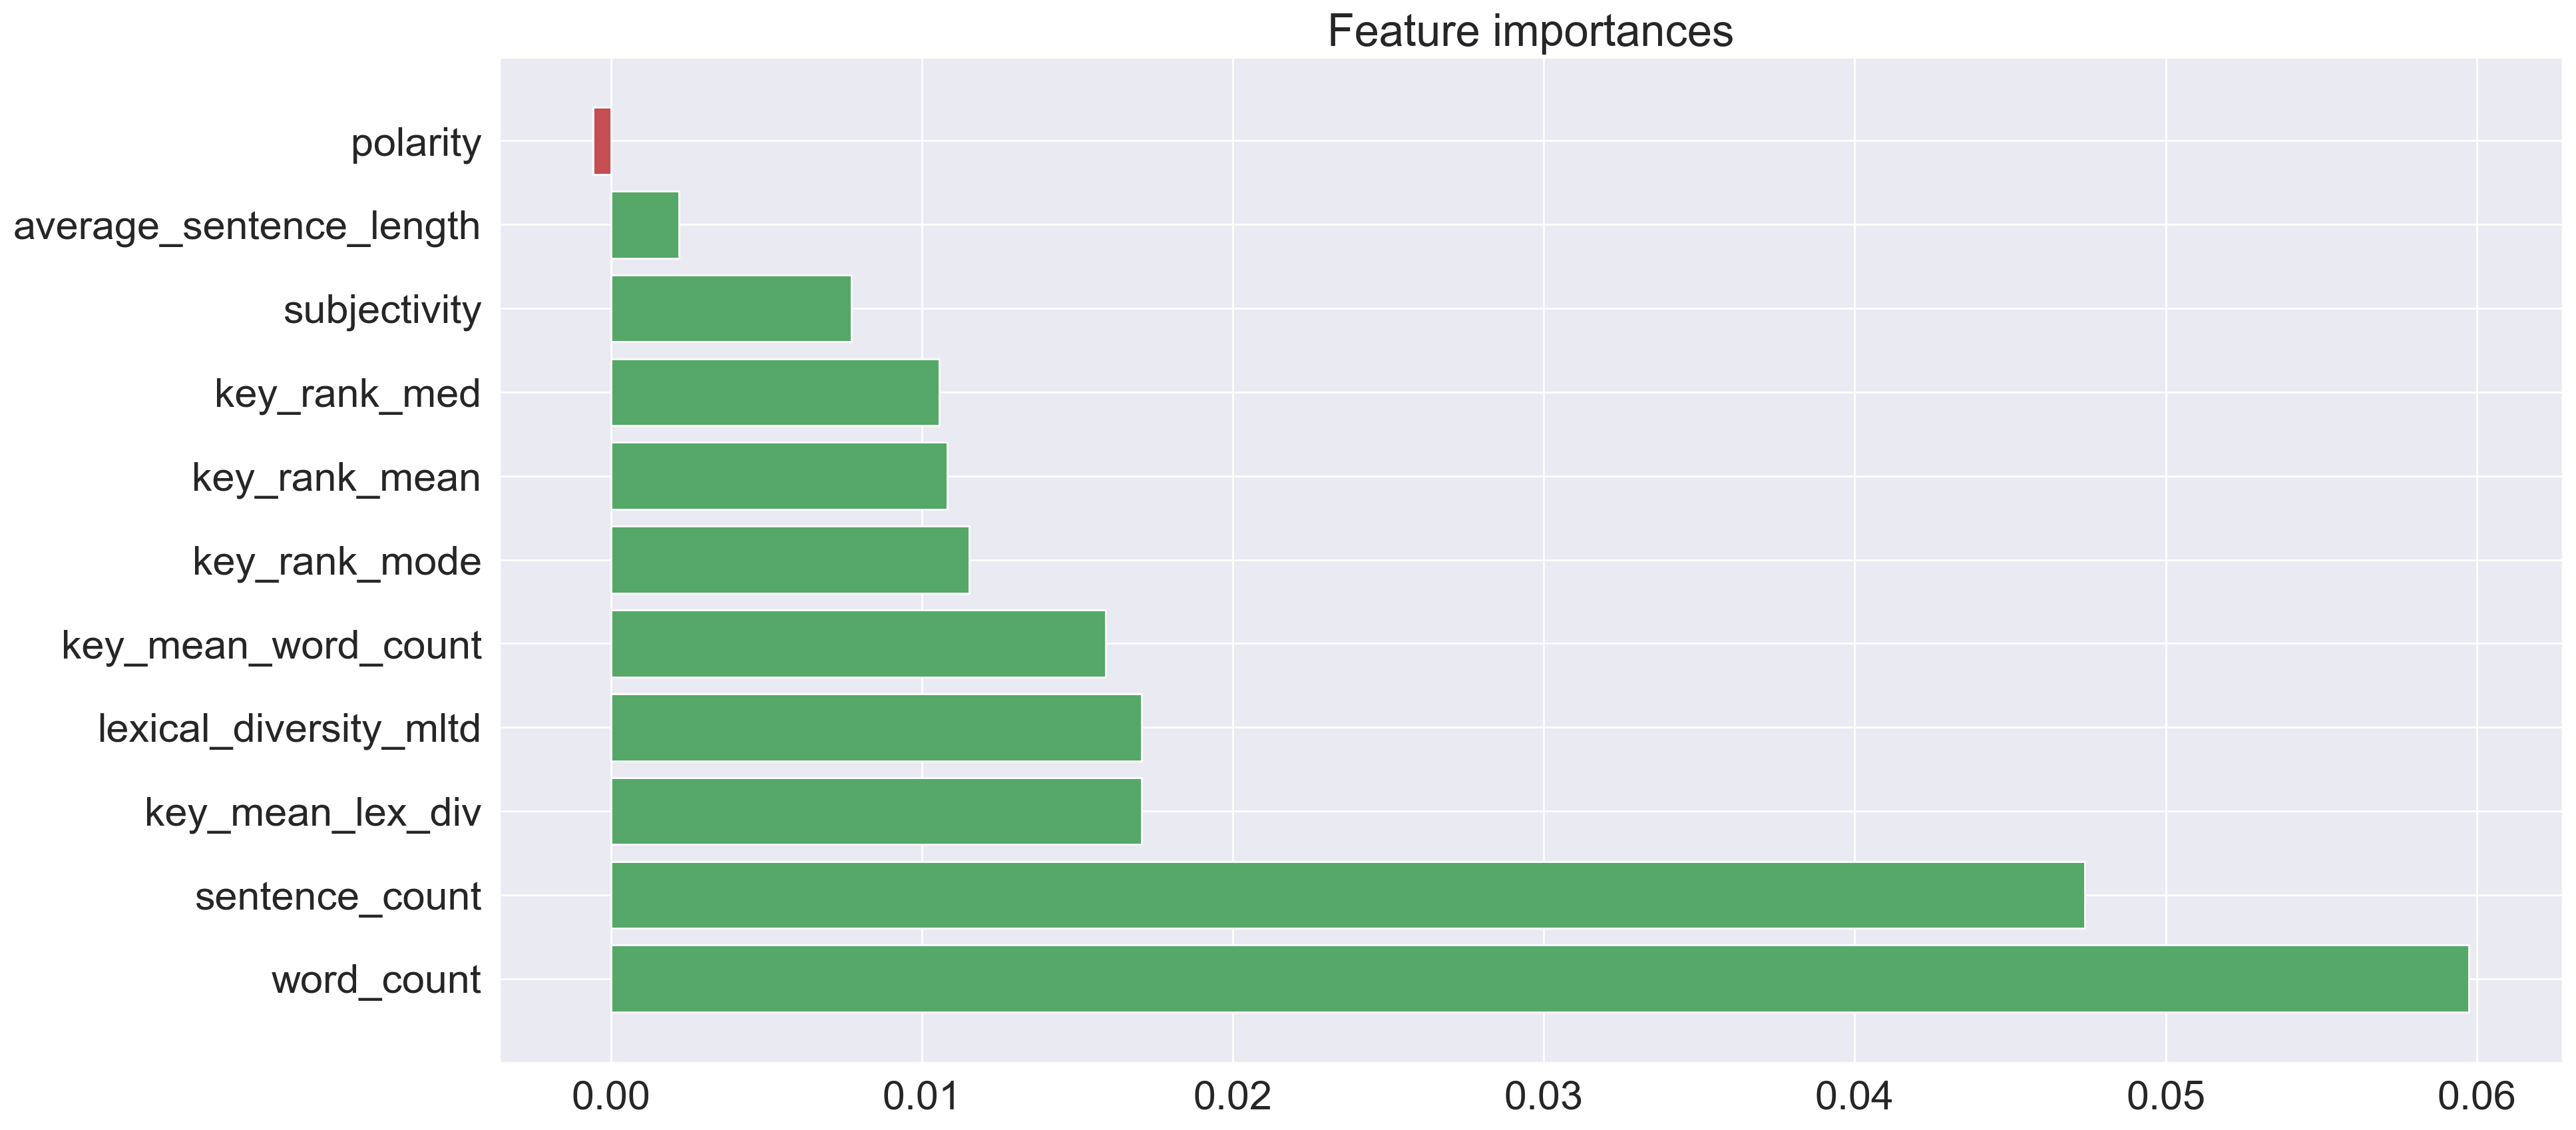

In [ ]:
features = list(feature_data.columns.values)

from sklearn.inspection import permutation_importance

imps = permutation_importance(nb_model, X_train_, y_train, n_repeats=10,)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]
imps
# Print the feature ranking

featureorder = []

for f in range(X_train_.shape[1]):
    featureorder.append(features[indices[f]])
    
featurecount = len(featureorder)
plt.figure(figsize=(20, 10))
plt.title("Feature importances")
plt.barh(range(X_train_.shape[1]), importances[indices], color = pd.DataFrame(importances[indices]>=0).replace({True:'g',False:'r'})[0].to_list())
plt.yticks(range(X_train_.shape[1]), [features[indices[i]] for i in range(featurecount)],rotation = 0)
plt.ylim([-1, X_train_.shape[1]])
plt.show()


In [ ]:
importances

array([0.05692209, 0.04681262, 0.00257566, 0.01854475, 0.00965873,
       0.00927238, 0.01068899, 0.01661301, 0.01854475, 0.00090148,
       0.00624598])